# <center><font color = 'green'> Amazon Product <font color = 'orange'>Review Analysis</font>


#  <center><font color = 'orange'>Grocery <font color = 'green'>Gourmet</font>

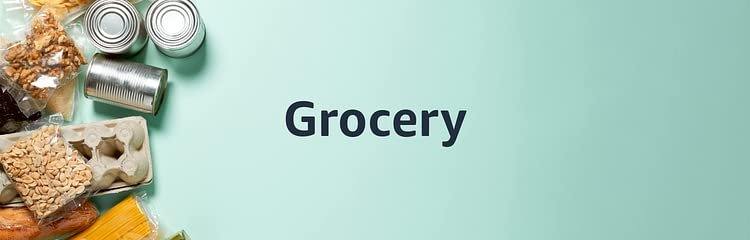

# <font color = 'orange'>Context</font>

---

* <font color = 'green'>**With the rise of social media and online review platforms, monitoring product reviews has become even more important as customers can quickly and easily share their experiences with a wide audience, making it essential for businesses to maintain a positive reputation and address any negative feedback promptly.**

* <font color = 'green'>**Monitoring product reviews help businesses understand their target audience better and plan their marketing strategies to effectively reach and engage their customers.**

* <font color = 'green'>**Reviews can provide valuable feedback on the usability and functionality of a product, allowing companies to make necessary improvements and updates.**

* <font color = 'green'>**Analyzing reviews can help businesses to better position themselves in the market and gain a competitive advantage.**

* <font color = 'green'>**Analyzing the Grocery-Gourmet Food Amazon reviews can be a valuable tool for businesses operating in these categories to gain competitive advantage and improve customer satisfaction.**</font>

---

# <font color = 'orange'>Objective</font>


* <font color = 'green'>**Exploring Customer Feedback and Insights from Grocery-Gourmet Food Products on Amazon.**


* <font color = 'green'>**Uncover Valuable Customer Insights and Trends from Grocery-Gourmet Food Products.**


* <font color = 'green'>**Perform data analysis on the Amazon Grocery-Gourmet Food review dataset to gain insights on customer preferences, behavior, sentiment, and common issues and complaints with products in these categories.**


---

# <font color = 'green'>Data <font color = 'orange'>Description</font>


**<font color = 'green'>reviewerID</font> - ID of the reviewer, e.g. A2SUAM1J3GNN3B**

**<font color = 'green'>asin</font> - ID of the product, e.g. 0000013714**

**<font color = 'green'>reviewerName</font> - name of the reviewer**

**<font color = 'green'>vote</font> - helpful votes of the review**

**<font color = 'green'>style</font> - a disctionary of the product metadata, e.g., "Format" is "Hardcover"**

**<font color = 'green'>reviewText</font> - text of the review**

**<font color = 'green'>overall</font> - rating of the product**

**<font color = 'green'>summary</font> - summary of the review**

**<font color = 'green'>unixReviewTime</font> - time of the review (unix time)**

**<font color = 'green'>reviewTime</font> - time of the review (raw)**

**<font color = 'green'>image</font> - images that users post after they have received the product**

**<font color = 'green'>title</font> - name of the product**

**<font color = 'green'>feature </font>- bullet-point format features of the product**

**<font color = 'green'>description </font>- description of the product**

**<font color = 'green'>price </font>- price in US dollars (at time of crawl)**

**<font color = 'green'>imageURL </font>- url of the product image**

**<font color = 'green'>imageURLHighRes </font>- url of the high resolution product image**

**<font color = 'green'>related</font> - related products (also bought, also viewed, bought together, buy after viewing)
salesRank - sales rank information**

**<font color = 'green'>brand</font> - brand name**

**<font color = 'green'>categories</font> - list of categories the product belongs to**

**<font color = 'green'>tech1</font> - the first technical detail table of the product**

**<font color = 'green'>tech2 </font>- the second technical detail table of the product**

**<font color = 'green'>similar</font> - similar product table**

---

# Importing libraries

In [1]:
# import required packages for the analysis.

# for loading data

import gzip
import json

# For numerical and statistical functions

import numpy as np
import pandas as pd

# For visulizations

import matplotlib.pyplot as plt

import seaborn as sb
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# To suppress all warnings raised 

import warnings
warnings.filterwarnings('ignore')

# Importing data 
    
* **Creating a function that convert the json file to pandas dataframe**

In [3]:
# Defining a function to load the datasets from json to pandas dataframe.

def parse(path):
    
    g = gzip.open(path, 'rb')
    
    for l in g : yield json.loads(l)

def getDF(path, nrows = None):
    
    i, df = 0, {}
    
    for d in parse(path):
        
        df[i] = d
        
        i += 1
        
        if nrows and i >= nrows : break
            
    return pd.DataFrame.from_dict(df, orient = 'index')

* **Grocery_and_Gourmet_Food - importing first 1 lakh records due to system requirements**

In [4]:
# Loading the Grocery_and_Gourmet_Food - review data

grocery_review = getDF('Grocery_and_Gourmet_Food_5_core.json', nrows = 100000)

# Loading the Grocery_and_Gourmet_Food - ratings data

grocery_ratings = pd.read_csv('Grocery_and_Gourmet_Food_ratings.csv', nrows = 100000, header = None)

# Loading the Grocery_and_Gourmet_Food - meta data

grocery_meta = getDF('meta_Grocery_and_Gourmet_Food.json.gz', nrows = 100000)

# Data Overview - 5 samples of each dataset

* **Grocery_and_Gourmet_Food**

In [6]:
# 5 sample records of grocery_review data

pd.set_option('display.max_columns', None)

grocery_review.sample(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
84549,5.0,True,"11 17, 2012",A27AIVCUT5YUYB,B000F4DKAI,Lee,"Although decaffeinated, this tea is a lovely a...",Love this tea,1353110400,NaN,NaN,NaN
72280,1.0,False,"12 22, 2007",A3KUC5K5VSJNU9,B000EM6PS0,Grranimal,I know that white tea is supposed to have even...,"Sorry, No",1198281600,4,"{'Size:': ' 18 Count (Pack of 6)', 'Style:': '...",NaN
61845,5.0,True,"04 7, 2014",AUF40S20BZNQC,B000E63LAQ,Annie,This is my favorite green tea hot or cold. It...,Love this tea,1396828800,NaN,"{'Size:': ' 20 Count (Pack of 6)', 'Flavor:': ...",NaN
23178,4.0,True,"05 13, 2015",A2WR3ZU8PV5R0H,B0005XP7EG,Client Kindle,I used in a red velvet cake and it is half gon...,McCormick Red Food Color,1431475200,NaN,NaN,NaN
14398,5.0,True,"03 1, 2016",A22QYQG2GPIDXN,B0001M0Z6Q,J from MA,VERY GOOD !!,VERY GOOD !!,1456790400,NaN,NaN,NaN


In [7]:
# 5 sample records of grocery_ratings data #ALP49FBWT4I7V

grocery_ratings.head(5)

,0,1,2,3
0,1888861614,ALP49FBWT4I7V,5.0,1370304000
1,1888861614,A1KPIZOCLB9FZ8,4.0,1400803200
2,1888861614,A2W0FA06IYAYQE,4.0,1399593600
3,1888861614,A2PTZTCH2QUYBC,5.0,1397952000
4,1888861614,A2VNHGJ59N4Z90,4.0,1397606400


In [8]:
# 5 sample records of grocery_meta data

grocery_meta.sample(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
77065,"[Grocery & Gourmet Food, Candy & Chocolate]",,"[24oz Tub Of Zachary Valentine Candy corn, Sta...",,Zachary Valentines Candy Corn 24 Oz,[],,Zachary,[],"274,843 in Grocery & Gourmet Food (",[],Grocery,,,,B004M4Q70M,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '2 pounds', 'ASIN: ': 'B0..."
62055,"[Grocery & Gourmet Food, Candy & Chocolate, Ca...",,[Milk Peanut Cluster: 5LB Case Crunchy peanuts...,,Milk Peanut Cluster: 5LB Case,[],,Asher's,[],"682,353 in Grocery & Gourmet Food (",[],Grocery,,,,B003EMSSBO,[],[],"{' Item Weight: ': '5 pounds', 'Shipp..."
43950,"[Grocery & Gourmet Food, Candy & Chocolate, Je...",,[],,Now and Later Strawberry Flavored Candy Forty...,[B0015UCE08],,Now and Later,[],"468,937 in Grocery & Gourmet Food (",[],Grocery,,,,B001H3R6YM,[],[],"{' Item Weight: ': '1.69 pounds', 'Sh..."
43141,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[The Fallot family has enjoyed a worldwide rep...,,Green Peppercorn Mustard Fallot French Dijon M...,"[B000Y4IE82, B00SCKOAYM, B002O0ACT8, B00IWXYIA...",,Edmond Fallot,[],"118,223 in Grocery & Gourmet Food (",[],Grocery,,,$35.24,B001FQ0W88,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{' Item Weight: ': '7 pounds', 'Shipp..."
81403,"[Grocery & Gourmet Food, Canned, Jarred & Pack...",,[Crown Prince Natural Smoked Oysters are natur...,,Crown Prince Natural Smoked Oysters in Pure Ol...,[],,Crown Prince,[],[],"[B00GJ0WW24, B00EB4JDAO, B000FEDHXI, B0793LMFF...",Grocery,,,,B004XM4LEW,[],[],"{'Shipping Weight:': '4 ounces', 'Domestic Shi..."


# <center><font color = 'orange'>Data <font color = 'green'>Understanding
    
### **<center><font color = 'green'>Exploring and summarizing the data, identifying patterns or trends, and understanding any potential issues or biases in the data.**

In [9]:
# structure of the data file

print(f"In grocery_review data there are totally {grocery_review.shape[0]} Records and {grocery_review.shape[1]} Features") 

In grocery_review data there are totally 100000 Records and 12 Features


**Observations**

**There are totally 1 lakh observations and 12 features which contains the review data for our analysis purpose**

In [9]:
# information about column names and their respective data types, missing values, and memory consumption 

grocery_review .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         100000 non-null  float64
 1   verified        100000 non-null  bool   
 2   reviewTime      100000 non-null  object 
 3   reviewerID      100000 non-null  object 
 4   asin            100000 non-null  object 
 5   reviewerName    99988 non-null   object 
 6   reviewText      99967 non-null   object 
 7   summary         99984 non-null   object 
 8   unixReviewTime  100000 non-null  int64  
 9   vote            14985 non-null   object 
 10  style           62094 non-null   object 
 11  image           516 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 9.3+ MB


**Obseravations**

* **Overall, This Data contains mostly object type data, with some columns containing null values.**
* **The 'overall', 'verified', 'reviewTime', 'reviewerID', and 'asin' columns seem to have non-null values in every row, while the other columns contain some null values.**
* **The date and time columns are not in the propeer format, needs to be converted.**
* **The data also comes with boolean type data which represent it is verified or not.**

In [13]:
# Statistical summary of the data

grocery_review.describe(include = ['object', 'number']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
overall,100000.0,NaN,NaN,NaN,4.47414,1.040559,1.0,4.0,5.0,5.0,5.0
reviewTime,100000,4401,"03 1, 2016",110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewerID,100000,55906,A1YUL9PCJR3JTY,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asin,100000,2345,B0001LO3FG,2919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewerName,99988,46127,Amazon Customer,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewText,99967,86481,good,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summary,99984,56978,Five Stars,18638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unixReviewTime,100000.0,NaN,NaN,NaN,1416230421.984,74517829.865586,965779200.0,1386957600.0,1428796800.0,1466640000.0,1526428800.0
vote,14985,148,2,5355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
style,62094,3125,{'Size:': ' 100 Count'},953,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

* **The rating of the product is ranging from 0 to 5**
* **In this data all the columns except overall and datetime columns are string**
* **Only 0.5% of the records are available for image catgeory alos huge no of records are missing from vote and style**

In [10]:
# Determining how many missing values exist in the data

Nan = pd.DataFrame(grocery_review.isna().sum(), columns = ['Total Null values'])

Nan['Percent of null values'] = Nan['Total Null values'] / len(grocery_review) * 100

Nan = Nan.sort_values('Percent of null values', ascending = False)

Nan[Nan['Total Null values'] > 0]

,Total Null values,Percent of null values
image,99484,99.484
vote,85015,85.015
style,37906,37.906
reviewText,33,0.033
summary,16,0.016
reviewerName,12,0.012


**Observations**

* **The variable 'reviewerName', 'reviewText', 'summary' has < 1 % missing values.** 
* **Similarly, The last three variables,'vote', 'style', 'image' have relatively high percentages of missing values, which means that a large proportion of the data for these variables is missing.**

# <center><font color = 'green'>Data <font color = 'orange'>Cleaning

### **<font color = 'black'><center>Here we are going to identify and remove or correcting errors, inconsistencies, and inaccuracies in the dataset.**
    

In [11]:
# converting all the column names to uniform format - capitalize using str 

grocery_review.columns = map(str.capitalize, grocery_review.columns)

# Preview of data

grocery_review[:2]

,Overall,Verified,Reviewtime,Reviewerid,Asin,Reviewername,Reviewtext,Summary,Unixreviewtime,Vote,Style,Image
0,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5.0,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN


In [12]:
# Dropping columns - most of these columns records are missing from the data and also not related to reviewtext

grocery_review.drop(['Image', 'Style', 'Reviewername', 'Vote', 'Unixreviewtime', 'Summary'], axis = 1, inplace = True)

In [18]:
# Converting reviewTime to date time format using  pandas

grocery_review['Reviewtime'] = grocery_review['Reviewtime'].apply(lambda x : pd.to_datetime(x, format = '%m %d, %Y'))

grocery_review['Reviewtime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 99967 entries, 0 to 99999
Series name: Reviewtime
Non-Null Count  Dtype         
--------------  -----         
99967 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


In [14]:
# Renaming column names for better understanding and simplicity

grocery_review.rename(columns = {'Overall' : 'Rating', 'Asin':'Product_id', 'Reviewtext' : 'Review'}, inplace = True)

In [15]:
# Converting Rating as integer type

grocery_review['Rating'] = grocery_review['Rating'].astype('int')

In [16]:
# Dropping null records since the missing records percentage is < 1%.

grocery_review.dropna(inplace = True)

* **We have performed data cleaning and data modification operations on this DataFrame, including column modification and dropping some columns as well as removing rows with null values.**

# <center><font color = 'green'>Sentiment <font color = 'orange'>Analysis
### **<center><font color = 'black'> Here we are going to analyse the sentiment of the customer based on the reviews**
    

* **Before sentiment analysis we need to clean the review data**

    **To clean the data we are using a library called regex, and spcay which is populaer in nlp tasks**

In [19]:
# importing libraries that are used to perform sentiment analysis

# For cleaning the text 

import re

import string

# importing spacy for nlp

import spacy

from spacy.lang.en import English

In [20]:
# Creating a function that checks for the following elements present in the reviewtext

def check_for_elements(df, column):
    
    results = {'punctuation': False, 'underscore': False, 'hashtags': False, 'urls': False, 'lowercase': False, 'extraspaces': False, 'numbers': False}
    
    if df[column].str.contains(r'[^\w\s]').any():       # Check for punctuation
        results['punctuation'] = True
    
    if df[column].str.contains('_').any():              # Check for underscore
        results['underscore'] = True
    
    if df[column].str.contains(r'#\w+').any():          # Check for hashtags
        results['hashtags'] = True
    
    if df[column].str.contains(r'https?://\S+|www\.\S+').any():  # Check for URLs
        results['urls'] = True
        
    if df[column].str.contains(r'<.*?>').any():         # check for html tags
        results['html_tags'] = True
    
    if df[column].str.contains(r'[a-z]').any():         # Check for lowercase
        results['lowercase'] = True
    
    if df[column].str.contains(r'\s{2,}').any():        # Check for extra spaces
        results['extraspaces'] = True
        
    if df[column].str.contains(r'\d').any():            # Check for numbers
        results['numbers'] = True
    
    return results                                      

In [21]:
# checkin unwanted elements present in the data before cleaning

print("Before Cleaning\n",check_for_elements(grocery_review, 'Review'))

Before Cleaning
 {'punctuation': True, 'underscore': True, 'hashtags': True, 'urls': True, 'lowercase': True, 'extraspaces': True, 'numbers': True, 'html_tags': True}


* **The review data contains unnecessary elements such as punctuation, underscores, hashtags, URLs, lowercase letters, extra spaces, numbers, and HTML tags, which are going to be cleaned using Regex.**

In [22]:
# Function that eliminates and return the new clean text

def clean_text(text):
   
    text = re.sub(r'[^\w\s]', '', text)        # remove punctuation
    
    text = re.sub(r'_', '', text)              # remove underscores
    
    text = re.sub(r'#\w+', '', text)           # remove hashtags
   
    text = re.sub(r'http\S+', '', text)        # remove URLs
    
    text = re.sub(r'<.*?>', '', text)          # Remove html tags
    
    text = re.sub(r'\d+', '', text)            # remove numbers
    
    text = text.lower()                        # convert to lowercase
    
    text = re.sub(r'\s+', ' ', text)           # remove extra spaces
    
    text = re.sub('[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    
    return text                                # Returns the text after cleaning

In [23]:
# Cleaning the review data

grocery_review['Review'] = grocery_review['Review'].apply(clean_text)

print("After Cleaning\n",check_for_elements(grocery_review, 'Review'))

After Cleaning
 {'punctuation': False, 'underscore': False, 'hashtags': False, 'urls': False, 'lowercase': True, 'extraspaces': False, 'numbers': False}


* **After performing the cleaning process using Regex, all the unnecessary elements such as punctuation, underscores, hashtags, URLs, lowercase letters, extra spaces, numbers and HTML tags are eliminated from the review data..**

### NLP - Lemmatization 

**is a process of transforming words into their root form to reduce them to their basic forms. The output of the lemmatization process is a meaningful representation of the original word which helps in text analysis.**

In [24]:
# Loading the Spacy English model

nlp = spacy.load('en_core_web_sm')

# A function that apply lemmatization to the review text

def lemmatize_text(text):
    
    doc = nlp(text)
    
    return " ".join([token.lemma_ for token in doc])

In [25]:
# apply lemmatization to a Reviewtext column using spacy

grocery_review['Review_LEM'] = grocery_review['Review'].apply(lemmatize_text)

### NLP - Stop Words 

**are words that are frequently used in a language but do not add any significant meaning to the context of a text. Therefore, removing them from the text can help to improve the efficiency of analysis.**

In [26]:
# A function that removes stop words from the text

def spacy_tokenizer(text):
    
    doc = nlp(text)
    
    tokens = [token.text for token in doc if not token.is_stop]
    
    return ' '.join(tokens)

In [38]:
# Removing Stop words from the review data using spacy

grocery_review['Review_SW'] = grocery_review['Review_LEM'].apply(spacy_tokenizer)

In [39]:
# Preview of the cleaned data

grocery_review.sample(5)

,Rating,Verified,Reviewtime,Reviewerid,Product_id,Review,Review_LEM,Review_SW
87685,5,True,2016-10-28,A55W79ES2I3V9,B000FDDETQ,rare and awesome to be so pleasantly surprised...,rare and awesome to be so pleasantly surprised...,rare awesome pleasantly surprised ve love past...
86204,5,True,2016-09-24,AVTQB8FI2KW8Q,B000F9Z1V4,always a favorite im nearly and remember this ...,always a favorite I m nearly and remember this...,favorite m nearly remember treat childhood goo...
1871,5,True,2016-11-27,AVLLPX95EXYRU,B0000D916Y,these are by far the best cookies i have ever ...,these be by far the good cookie I have ever bu...,far good cookie buy usually label homemade tas...
98391,2,True,2017-03-14,A2PVQOXIZBW0S8,B000G7TBUW,tasty but arrived all broken should have known...,tasty but arrive all break should have know well,tasty arrive break know
28315,5,True,2011-08-20,A1UL74OE5A2ZYI,B0007LXU0Y,i love these bars i didnt realize the chocolat...,I love these bar I do not realize the chocolat...,love bar realize chocolate spread think maybe ...


* **The clean data is being converted into the CSV format for ease of storage and further analysis.**

In [40]:
# converting the preprocessed data to csv file

grocery_review.to_csv('Grocery.csv', index = False)

### NLP - Sentiment Analysis

* **We are using processed review data to identify whether the feedback is Positive, Negative, or Neutral based on the words used in the reviews.**

In [2]:
# Reading grocery processed file

grocery = pd.read_csv("Grocery.csv")

In [5]:
# Since there are some records are missing we are imputing with mode

grocery["Review_SW"] = grocery["Review_SW"].fillna(grocery["Review_SW"].mode()[0])  

grocery["Review_LEM"] = grocery["Review_LEM"].fillna(grocery["Review_LEM"].mode()[0])  

grocery["Review"] = grocery["Review"].fillna(grocery["Review"].mode()[0])  

# Extracting thé product names of the respective id's

In [7]:
# Importing libraries

import requests

from bs4 import BeautifulSoup

In [16]:
# Extracting the id's

product_ids = list(grocery['Product_id'].unique())

In [129]:
def get_product_name(product_id):
   
    url = 'https://www.amazon.com/'+ str(product_id)
    
    response = requests.get(url, headers)
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    title = soup.find('span', id =  'productTitle')
    
    if title:  return title.text.strip()
    
    else :     return None

In [130]:
for i in product_ids[:20]:
    
    names = get_product_name(i)
    
    print(f'Id : {i}-> Product_Names : {names}')

Id : 4639725183-> Product names : None
Id : 4639725043-> Product names : None
Id : 5463213682-> Product names : None
Id : 9742356831-> Product names : None
Id : B00004S1C5-> Product names : None
Id : B00004W4VD-> Product names : None
Id : B000052X2S-> Product names : None
Id : B000052Y74-> Product names : None
Id : B00005344V-> Product names : None
Id : B00005BPQ9-> Product names : None
Id : B00005IX97-> Product names : None
Id : B00005OTYO-> Product names : None
Id : B00006BN4U-> Product names : None
Id : B00006FMLY-> Product names : None
Id : B00006FWVX-> Product names : None
Id : B00006G930-> Product names : None
Id : B00006IDK9-> Product names : None
Id : B00006IDJY-> Product names : None
Id : B00006IDJU-> Product names : None
Id : B000089D9T-> Product names : None


### Text Blob

* **To achieve sentiment analysis we are using Text blob library**

**TextBlob is a Python library used for processing textual data, such as natural language processing tasks like sentiment analysis, noun phrase extraction, and more.**

In [43]:
# A function that classify the sentiments based on the reviews.

from textblob import TextBlob

def get_sentiment(text):
    
    text_str = str(text)
    
    blob = TextBlob(text_str)
    
    t =  blob.sentiment.polarity 
    
    if t > 0 : return 'positive'
    
    elif t < 0 : return 'negative'
    
    else : return 'neutral'

In [46]:
# Using TextBlob to analyze the reviews and decide its sentiment,This will help us understand how customers feel about the product.

# Predicting sentiments based on the review data which is free from lemmatization and stop words

grocery['Sent_REV'] = grocery['Review'].map(get_sentiment)

# Predicting sentiments based on the lemmatized data with stopwords

grocery['Sent_LEM'] = grocery['Review_LEM'].map(get_sentiment)

# Predicting sentiments based on the cleaned data 

grocery['Sent_CD'] = grocery['Review_SW'].map(get_sentiment)

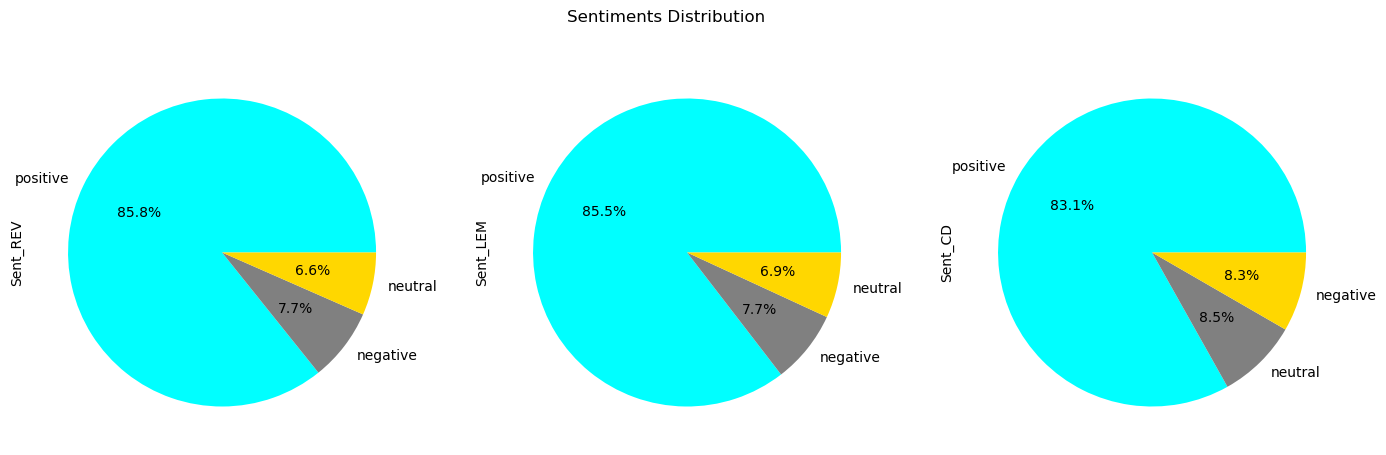

In [48]:
# How textblob classifies sentiments based on different reviews

import matplotlib.pyplot as plt

color = ['cyan', 'grey', 'gold']

plt.figure(figsize = (17, 5))
plt.suptitle("Sentiments Distribution")

plt.subplot(131)
grocery['Sent_REV'].value_counts().plot(kind = 'pie', colors = color, autopct = '%1.1f%%')

plt.subplot(132)
grocery['Sent_LEM'].value_counts().plot(kind = 'pie', colors = color, autopct='%1.1f%%')

plt.subplot(133)
grocery['Sent_CD'].value_counts().plot(kind = 'pie', colors = color, autopct='%1.1f%%')

plt.show()

In [50]:
# Creating Polarity values using clean data

def get_polarity(text): return TextBlob(str(text)).sentiment.polarity

# Predicting Polarity values based on the review data 

grocery['Polarity'] = grocery['Review_SW'].map(get_polarity)

**How textblob classifies sentiments based on different reviews**

In [51]:
# converting the sentiments applied data to csv file

grocery.to_csv('Grocery_sentiments.csv', index = False)

**In this case, since the clean data has the highest count of predicted sentiments, it might be preferable to use the clean data for sentiment analysis.**

# <center> <font color = 'green'>Clustering the data based on the features.


* **Loading the Sentiment applied data**

In [73]:
# Reading grocery processed file with sentiments 

grocery_sen = pd.read_csv("Grocery_sentiments.csv")

### Data Cleaninig

In [74]:
# Renaming some columns in meta data for merging

grocery_meta.rename(columns = {'asin' : "Product_id", 'main_cat' : 'Category', 'price' : 'Price'}, inplace = True)

# Merging grocery data and meta data using a Product_id, in meta data we are using columns that are needed for analysis

Grocery = pd.merge(grocery_sen, grocery_meta[['Product_id', 'Category', 'Price']], on = 'Product_id')

In [75]:
# Extracting the columns which are needed after merging with meta data

Grocery = Grocery[['Rating', 'Verified', 'Reviewtime', 'Reviewerid', 'Product_id',
       'Review_SW', 'Sent_CD',
       'Category', 'Price', 'Polarity']]

In [76]:
# Renaming columns for simplicity and better understanding

Grocery.rename(columns = {'Review_SW' : "Review", 'Sent_CD' : 'Sentiments', 'rank' : 'Rank'}, inplace = True)

In [77]:
# checkin unwanted elements present in the data before cleaning in the price column

print("Before Cleaning") 

check_for_elements(Grocery, 'Price')

Before Cleaning


{'punctuation': True,
 'underscore': True,
 'hashtags': True,
 'urls': True,
 'lowercase': True,
 'extraspaces': False,
 'numbers': True}

* **We can see that the price data is filled withy many inconsistencies and we are going to fetch only the records that are matching our price data**

In [78]:
# A function to filter rows matching the pattern $14.95

def pattern(df, col):
    
    x = df[col].str.contains('\$[\d]+\.[\d]+')
    
    return df[x]

# After removing inconsistencies still there are some extra special charatcers such as '_' and we are removing that records

def Clean(price):   
    
    if '-' in price : return 0  
    
    else :  price = price.replace('$', '')
    
    return float(price)

In [79]:
# Fetching only the records that are the matching the pattern [$14.95]

Grocery  =  pattern(Grocery, 'Price')

# Removing dollars and converting into float

Grocery['Price'] = Grocery['Price'].apply(Clean)

In [80]:
# There are some records with 0 price and we are going to impye those records with average

# Replace all price values of 0 to NaN

Grocery['Price'].replace(0.0, np.NaN, inplace = True)

# Using fillna we are going to impute the values

Grocery['Price'] = Grocery['Price'].fillna(Grocery['Price'].mean(skipna = True))

In [81]:
# Creting dummy for sentiment colum - converting text to numerical

Grocery = Grocery.join(pd.get_dummies(Grocery['Sentiments'], prefix = 'Sentiment'))

In [82]:
# converting the sentiments applied data to csv file

Grocery.to_csv('Grocery_sentiments_dummy.csv', index = False)

* **The price column is completely converted to float values and no presence of 0 price**

In [83]:
# Reading grocery processed file with sentiments 

Grocery = pd.read_csv("Grocery_sentiments_dummy.csv")

In [84]:
# We are import K - Means Cluster from sci - kit cluster family

from sklearn.cluster import KMeans

# Importing TfidfVectorizer to convert the text data into numerics

from sklearn.feature_extraction.text import TfidfVectorizer

# Importing silhouette_score

from sklearn.metrics import silhouette_score

# importing Standard scaler to avoid the impact of the outliers

from sklearn.preprocessing import StandardScaler

In [86]:
# Fetching the features that are going to be used for clustering

x = Grocery[['Price', 'Sentiment_positive', 'Sentiment_neutral', 'Sentiment_negative', 'Rating']]

# Scaling the features

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [87]:
# Finding best k using elbow curve and silhouette_score

k_range, error, scores = range(2, 6), [], []

for k in k_range:
    model = KMeans(n_clusters = k, random_state = 11, init = 'k-means++') 
    model.fit(x_scaled)
    error.append(model.inertia_)
    scores.append(silhouette_score(x_scaled, model.labels_))

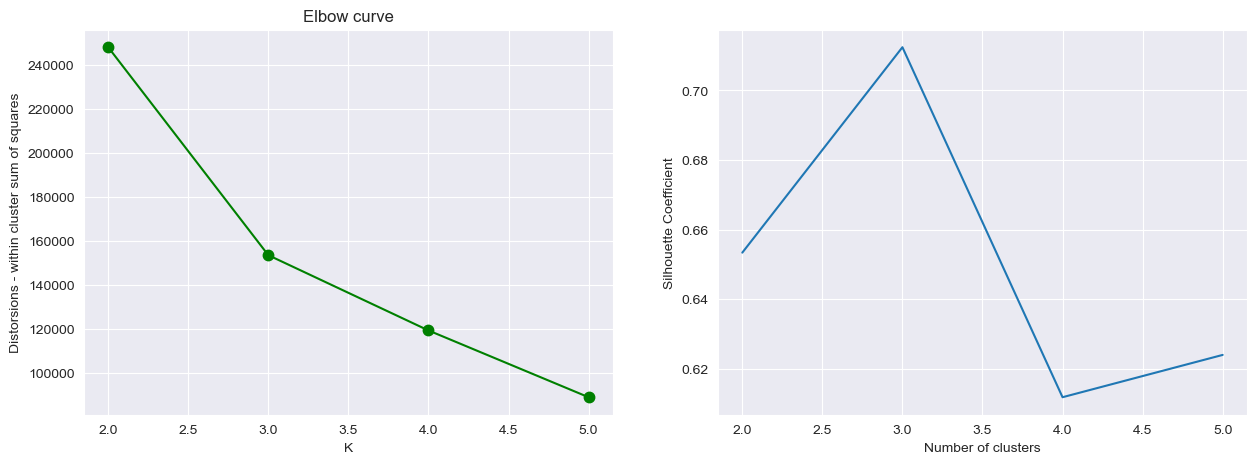

In [88]:
# Results of the elbow curve and silhouette_score - Visually 

fig = plt.figure(figsize = (15, 5))
sb.set_style('darkgrid')

plt.subplot(121)
plt.plot(range(2, 6), error, marker = '.', markersize = 15, color = 'g')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions - within cluster sum of squares')
plt.title('Elbow curve')


plt.subplot(122)
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

* **We found that the cluster values to build kmeans is 3 by using elbow curve and silhoutte score**

* **Building Kmeans model with cluster k = 3**

In [89]:
# Building the model using k = 3

km_model = KMeans(n_clusters = 3, random_state = 2)

# Training the model with k = 3 clusters

km_model.fit(x_scaled)

KMeans(n_clusters=3, random_state=2)

In [90]:
# Adding cluster to the grocery data

Grocery['Cluster'] = km_model.predict(x_scaled)

In [28]:
# Analyzing the  clusters

cluster_means = Grocery.groupby('Cluster').mean()

cluster_means

,Rating,Verified,Price,Polarity,Sentiment_negative,Sentiment_neutral,Sentiment_positive
Cluster,,,,,,,
0,4.63,0.87,22.05,0.44,0.00,0.00,1.00
1,3.24,0.82,21.17,-0.21,1.00,0.00,0.00
2,4.35,0.92,20.35,0.00,0.00,1.00,0.00


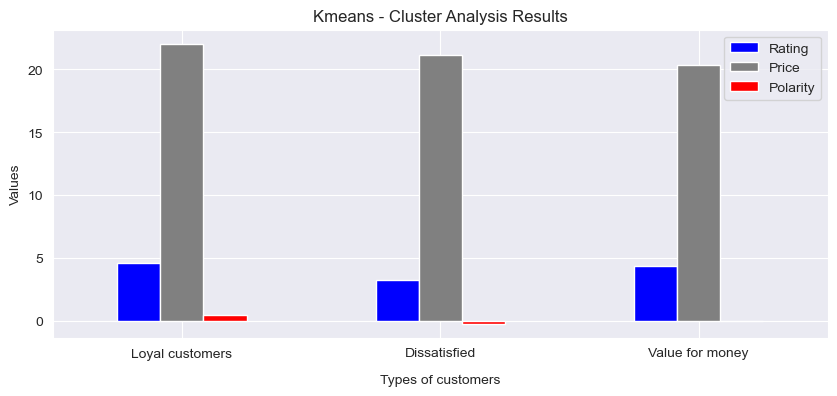

In [33]:
# cluster analysis

sb.set_style('darkgrid')
color = ['blue', 'grey', 'red']

cluster_means[['Rating','Price','Polarity']].plot(kind = 'bar', title = 'Kmeans - Cluster Analysis Results', figsize = (10, 4), color = color)

plt.ylabel('Values')

plt.xticks(rotation = 0)

plt.xlabel('Types of customers', labelpad = 10)

plt.gca().set_xticklabels(['Loyal customers', 'Dissatisfied', 'Value for money'])

plt.show()

## Observations

* **Cluster 0**</br>
    **has the highest average rating (4.626508), and the highest average price (22.048343).**
* **Cluster 2**</br> 
    **has a slightly lower average rating (4.345706), and a lower average price (21.171502).**  
* **Cluster 1**</br>
     **has the lowest average rating (3.237415), and an average price (20.352620).**

## Based on this information, we can conclude that:

   **Customers in Cluster 0**</br>
   **may be more likely to purchase high-quality and expensive products, as they have the highest average price and rating.**
   
   **Customers in Cluster 2**</br>
   **may be more focused on products with a neutral sentiment, and may be more price-sensitive, as they have the lowest average price.**
   
   **Customers in Cluster 1**</br>
   **may be less satisfied with their purchases, as they have the lowest average rating and a high percentage of negative sentiments.**

In [93]:
# converting the sentiments applied data to csv file

Grocery.to_csv('Grocery_sentiments_dummy.csv', index = False)

---
# <center><font color = 'green'>EDA

### <center> <font color = 'green'>Visulizations of data through plots and charts which help us to understand the patterns, outliers, distributions, imbalance, etc..

---
   

In [27]:
# Reading the file

Grocery = pd.read_csv("Grocery_sentiments_dummy.csv")

**1. What percentage of the sentiments are positive, negative, and neutral ?**

**2. What is the distribution of ratings in the dataset ?**

**3. What is the proportion of verified vs. unverified observations in the dataset ?**

**4. What is the different ypes of categories and their demand ?**

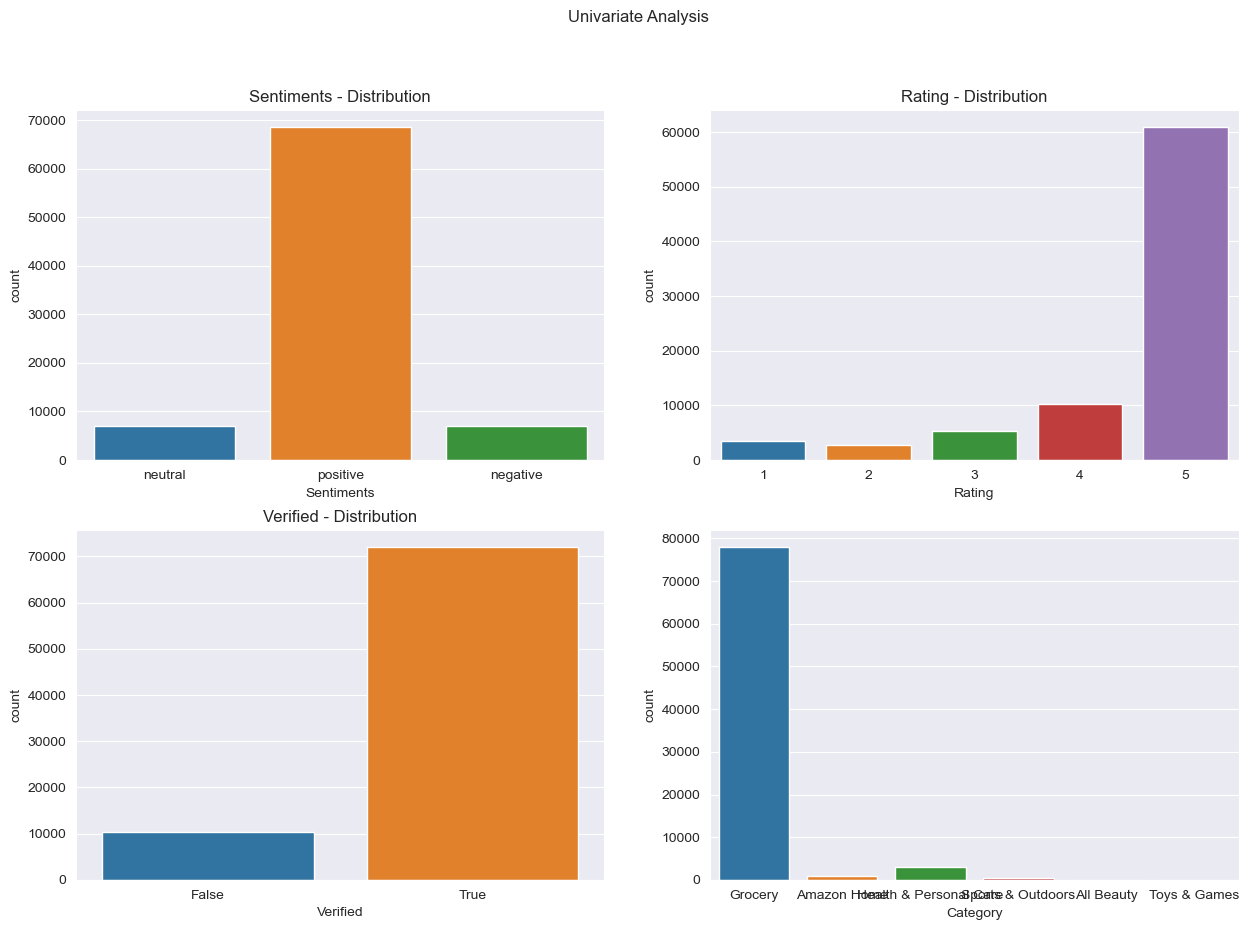

In [7]:
# Plotting univariate analysis using seaborn

sb.set_style('darkgrid')

fig, ax = plt.subplots(2, 2, figsize =(15, 10))
plt.suptitle('Univariate Analysis')

# What percentage of the sentiments are positive, negative, and neutral ?

sb.countplot(x = 'Sentiments', data = Grocery, ax = ax[0, 0])
ax[0, 0].set_title('Sentiments - Distribution')

# 2. What is the distribution of ratings in the dataset ?

sb.countplot(x = 'Rating', data = Grocery, ax = ax[0, 1])
ax[0, 1].set_title('Rating - Distribution')

# 3. What is the proportion of verified vs. unverified observations in the dataset ?

sb.countplot(x = 'Verified', data = Grocery, ax = ax[1, 0])
ax[1, 0].set_title('Verified - Distribution')

# 4. What is the different ypes of categories and their demand ?

sb.countplot(x = 'Category', data = Grocery, ax = ax[1, 1])
ax[1, 1].set_title('Category - Distribution')

plt.show()

# Observations

* **In sentiments** - **We can see that Positive reviews indicate that majority of the customers are satisfied with the product, and only 8% of  negative and neutral reviews are there which indicate that there are some issues and improvements can be made to make the customers more satisfied.**
* **In Ratimgs - 86% of ratings (4 & 5) indicated that the products are good, out of 86 % 73 % of customers feels positive about the products and rated 5 stars.6.5 % of customers feels neutral and rated 3 stars for the products. Remaining 7.5% customers feels bad and rated only 1 & 2 stars**

* **In verified - majority 87% of the purchase records are verified and the remaining 13 records are not verified**

* **In category - Majority of the products are from grocery**

**5 . What is the average rating distribution across different sentiments and cluster in the Grocery dataset?**

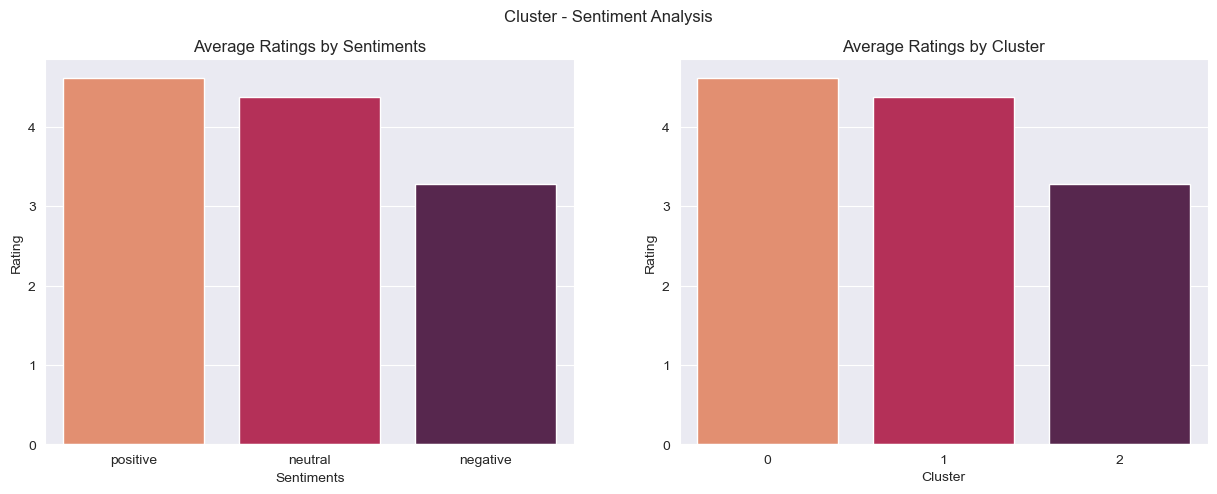

In [44]:
# What is the average rating distribution across different sentiments and cluster in the Grocery dataset?

fig, ax = plt.subplots(1, 2, figsize =(15, 5))

plt.suptitle('Cluster - Sentiment Analysis')

sentiment_means = Grocery.groupby('Sentiments')['Rating'].mean().sort_values(ascending = False).reset_index()

sentiment_cluster = Grocery.groupby('Cluster')['Rating'].mean().sort_values(ascending = False).reset_index()

sb.barplot(x = 'Sentiments', y = 'Rating', data = sentiment_means, order = sentiment_means['Sentiments'], palette ='rocket_r', ax = ax[0])
ax[0].set_title('Average Ratings by Sentiments')

sb.barplot(x = 'Cluster', y = 'Rating', data = sentiment_cluster, order = sentiment_cluster['Cluster'], palette ='rocket_r', ax = ax[1])
ax[1].set_title('Average Ratings by Cluster')

plt.show()

# Observations

**From the plot, The average rating of the positive and neutral customers > 4.5 and 4 respectively. While the negative customers have the average rating close < 3.5**

**Also we can conclude both the features are identical, we can assure that cluster 0 represents positive customers, cluster 1 represents neutral customers and clsuster 2 represents negative customers**

**6. What is the average price spend across different sentiments and clusters  in the Grocery dataset ?**

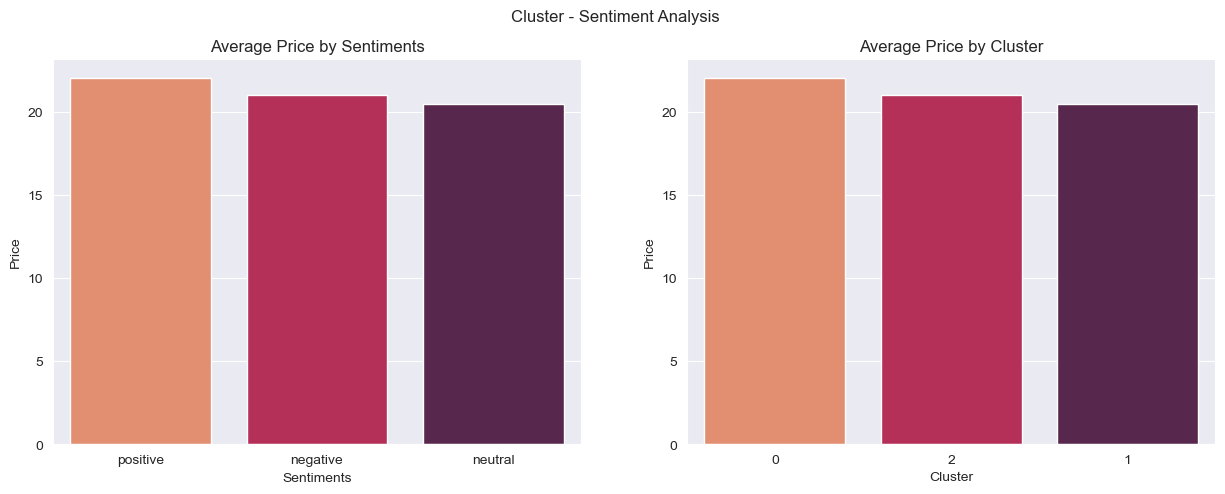

In [46]:
# What is the average price spend across different sentiments and clusters  in the Grocery dataset?

# Plotting univariate analysis using seaborn

fig, ax = plt.subplots(1, 2, figsize =(15, 5))
plt.suptitle('Cluster - Sentiment Analysis')

sentiment_means = Grocery.groupby('Sentiments')['Price'].mean().sort_values(ascending = False).reset_index()

sentiment_cluster = Grocery.groupby('Cluster')['Price'].mean().sort_values(ascending = False).reset_index()

sb.barplot(x = 'Sentiments', y = 'Price', data = sentiment_means, order = sentiment_means['Sentiments'], palette ='rocket_r', ax = ax[0])
ax[0].set_title('Average Price by Sentiments')

sb.barplot(x = 'Cluster', y = 'Price', data = sentiment_cluster, order = sentiment_cluster['Cluster'], palette ='rocket_r', ax = ax[1])
ax[1].set_title('Average Price by Cluster')

plt.show()

# Observations

**From the plot, The average price of the positive is $22.05$ and for neutral customers is $20.45$. While the negative customers have the average price of $21$, which means the negative customers buy products more than neutral customers**

**Since the the negative customers average price is very close to positive customers, we an say that the negative customers also go for quality products**

**From the to plots, clusters are highly impacted by these features**

**7. What kind of products are in demand and frequently bought by the customers**

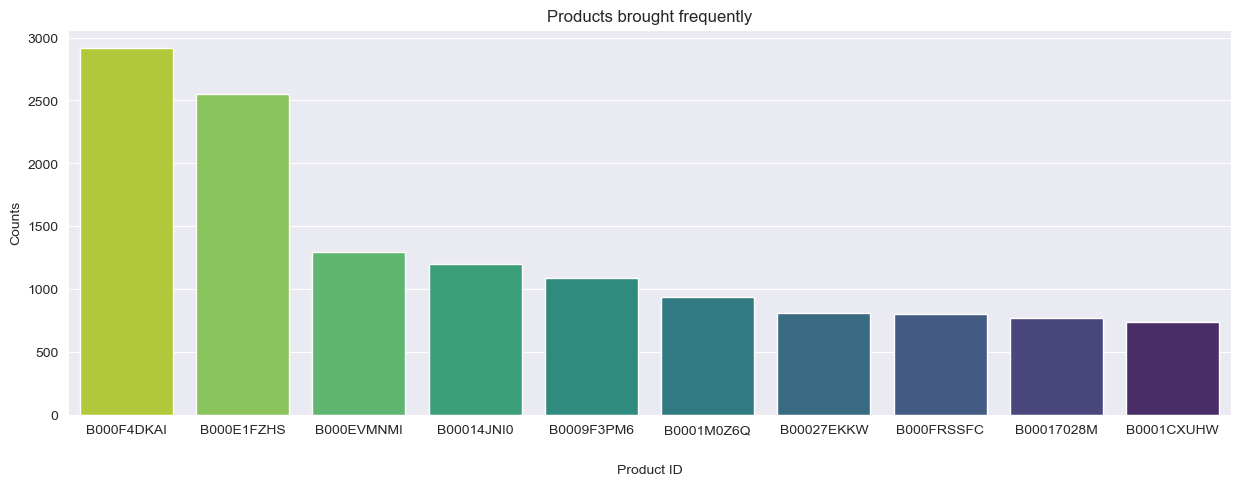

In [68]:
# What kind of products are in demand in current and frequently bought by the customers

product_counts = Grocery['Product_id'].value_counts(ascending = False).reset_index()

product_counts.rename(columns = {'index' :'Product_id', 'Product_id':'Counts'}, inplace = True)

product_counts = product_counts[product_counts['Counts'] >= 700]

plt.figure(figsize = (15, 5))

sb.set_style('darkgrid')

sb.barplot(x = 'Product_id', y = 'Counts', data = product_counts, order = product_counts['Product_id'], palette ='viridis_r')

plt.title('Products brought frequently')

plt.xlabel("Product ID", labelpad = 20)

plt.show()

# Observations 

* **From this plot, we can see that these top 5 products are very popular among customers who buys more frequently.** 
* **These products might be important for the inventories to keep in stock as they appear to be high in demand.** 

* **Additionally, if the inventory wants to promote these products, they could offer discounts or run marketing campaigns to further increase their sales. And this method can also applicable for the products which can create a demand.**

**8. What are top products that are not in demand or not bought bu the customers over the years**

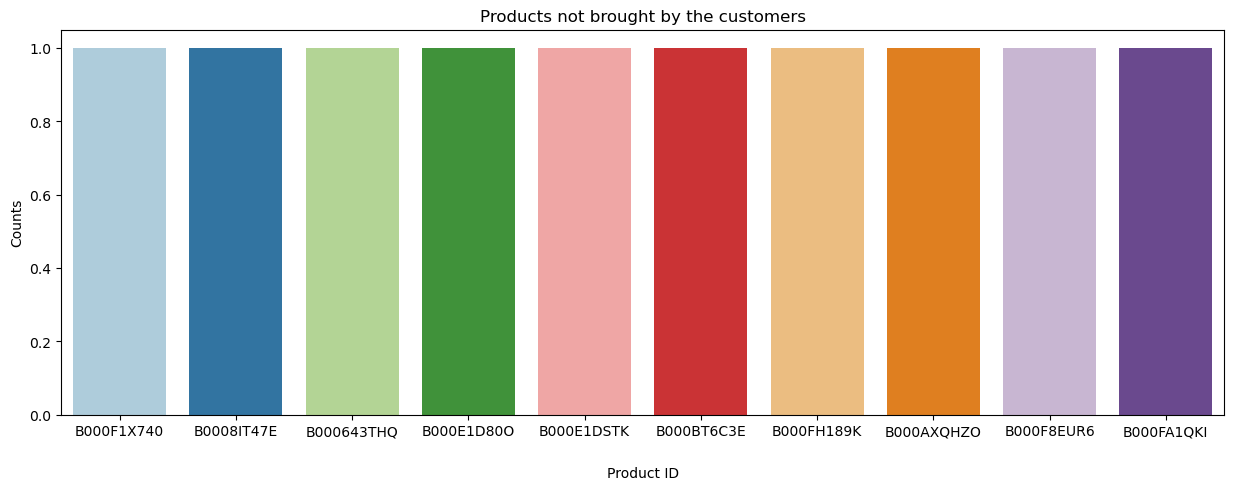

In [44]:
# What are top products that are not in demand or not bought bu the customers over the years

product_counts = Grocery['Product_id'].value_counts(ascending = True).reset_index()

product_counts.rename(columns = {'index' :'Product_id', 'Product_id':'Counts'}, inplace = True)

product_counts = product_counts.head(10)

plt.figure(figsize = (15, 5))

sb.barplot(x = 'Product_id', y = 'Counts', data = product_counts, order = product_counts['Product_id'], palette ='Paired')

plt.title('Products not brought by the customers')

plt.xlabel("Product ID", labelpad = 20)

plt.show()

**9. Which customer could be activelty buying products**

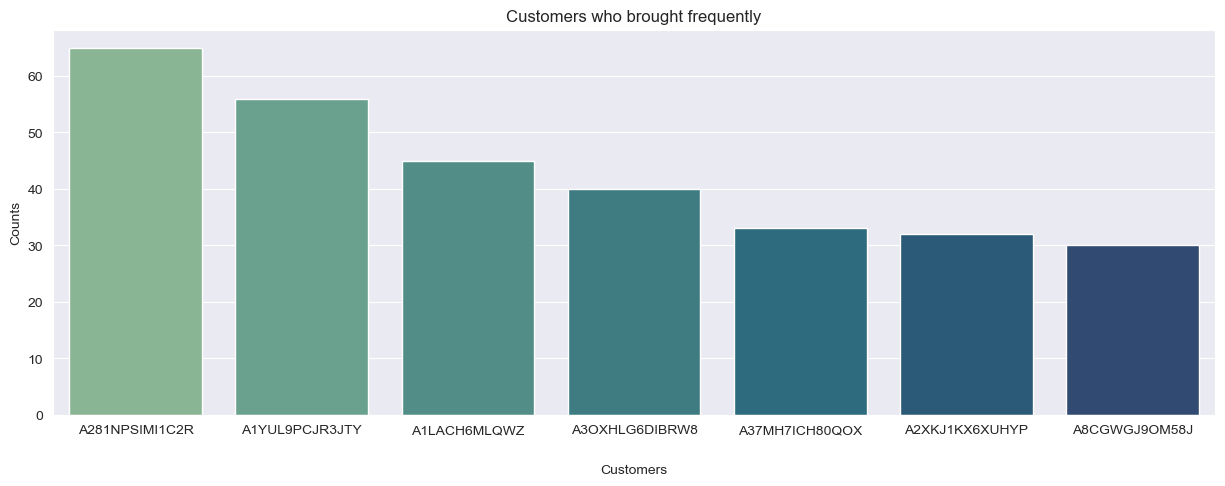

In [73]:
# What kind of products are in demand in current and frequently bought by the customers

customer_counts = Grocery['Reviewerid'].value_counts(ascending = False).reset_index()

customer_counts.rename(columns = {'index' :'Reviewerid', 'Reviewerid':'Counts'}, inplace = True)

customer_counts = customer_counts.head(7)

plt.figure(figsize = (15, 5))

sb.barplot(x = 'Reviewerid', y = 'Counts', data = customer_counts, order = customer_counts['Reviewerid'], palette ='crest')

plt.title('Customers who brought frequently')

plt.xlabel("Customers", labelpad = 20)

plt.show()

# Observations

* **These are the top 5+ customers who frequently purchase products.** 
* **Based on the frequency of their purchases, it seems like they are loyal customers who value the products. They may also be  who enjoy trying out new products or are repeat buyers of a specific product category.**

* **Offering them rewards or discounts and advertising similar products with deals will encourage them to keep buying and stay actively buying products from your store.**

**10. What are the top 10 + customers are stop purchasing**

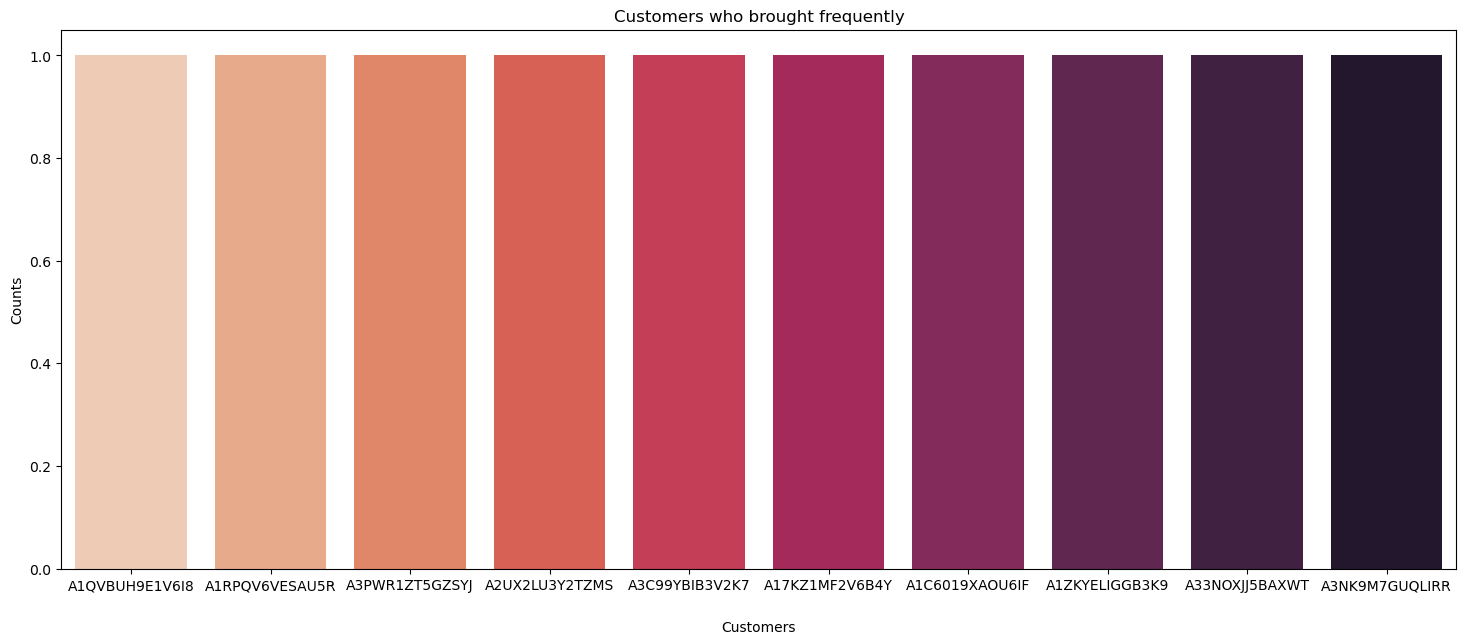

In [102]:
# What are the top 10 + customers are stop purchasing

customer_counts = Grocery['Reviewerid'].value_counts(ascending = True).reset_index()

customer_counts.rename(columns = {'index' :'Reviewerid', 'Reviewerid':'Counts'}, inplace = True)

customer_counts = customer_counts.head(10)

plt.figure(figsize = (18, 7))

sb.barplot(x = 'Reviewerid', y = 'Counts', data = customer_counts, order = customer_counts['Reviewerid'], palette ='rocket_r')

plt.title('Customers who brought frequently')

plt.xlabel("Customers", labelpad = 20)

plt.show()

# Observations

* **These are top 10 customers who are not very active in purchasing.**
* **Also, wécan see that these customers never buyed any products after the 1st purchase. This can happen beacuse the customers may be disappointed with the particular product they bought**

**11. What is the distributions of Polarity and Price**

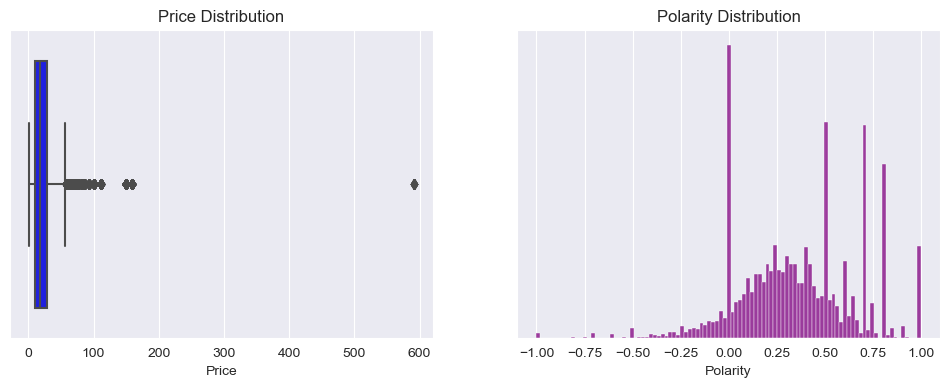

In [236]:
# What is the distributions of Polarity, Ratings, and Price

fig, axs = plt.subplots(ncols = 2, figsize = (12, 4))

# Create a box plot of the price distribution

sb.boxplot(x = 'Price', data = Grocery, ax = axs[0], color = 'blue')

# Create a histogram density plot of the polarity distribution

sb.histplot(x = 'Polarity', data = Grocery, ax = axs[1], color = 'purple')

# Add titles to the subplots
axs[0].set_title('Price Distribution')
axs[1].set_title('Polarity Distribution')

plt.yticks([])
plt.ylabel('')

plt.show()

# Observations

* **In price distribution we can see outliers. And we can see that the average price is around 20 and the maximum price is 600**

* **In Polarity distribution we can see that a large portion of records available between 0 - 1 and a very less portion availabe between 0 - -1.**

**12. Neutral Sentiments - Products not in demand**

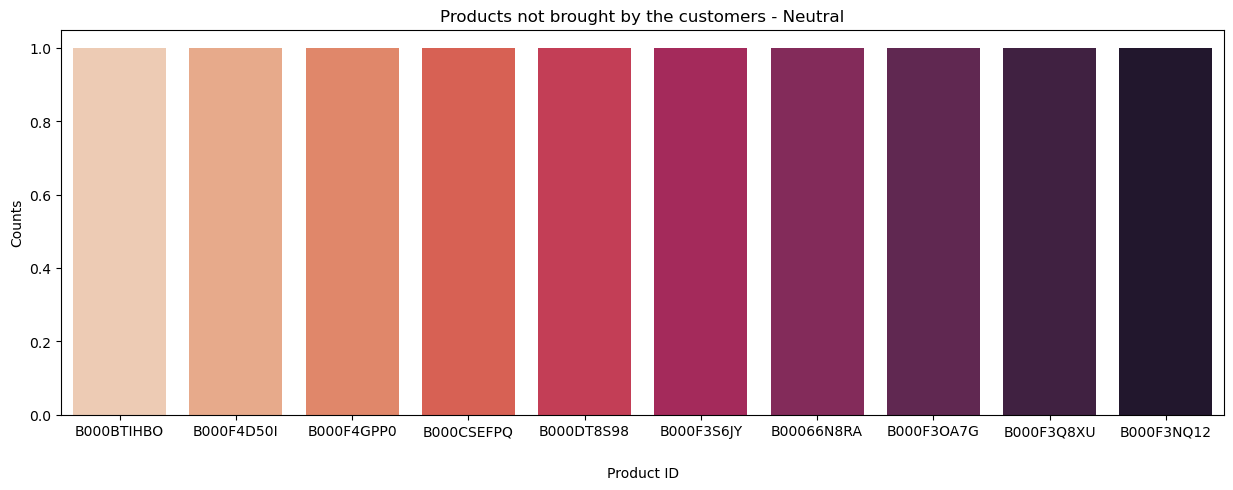

In [97]:
# Products that are not in demand but have a neutral sentiments

neu = Grocery[Grocery['Sentiments'] == 'neutral']

# What are top products that are not in demand or not bought bu the customers over the years for neutral products

product_counts = neu['Product_id'].value_counts(ascending = True).reset_index()

product_counts.rename(columns = {'index' :'Product_id', 'Product_id':'Counts'}, inplace = True)

product_counts = product_counts.head(10)

plt.figure(figsize = (15, 5))

sb.barplot(x = 'Product_id', y = 'Counts', data = product_counts, order = product_counts['Product_id'], palette ='rocket_r')

plt.title('Products not brought by the customers - Neutral')

plt.xlabel("Product ID", labelpad = 20)

plt.show()

# Observations

**This products have a neutral sentiments in customers prespective.**
**Making improvements on these products can impact the sales.By marketings and advertising.**

---
# <center><font color = 'green'>Times <font color = 'orange'>Series 

 **<center><font color = 'green'>Now we are going to predict what kind of products could be in
demand (Time Series Analysis).**
---

In [34]:
# For time series - to identify the seasonal components

from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
# Reading grocery processed file with sentiments 

Grocery = pd.read_csv("Grocery_sentiments_dummy.csv")

Grocery.head()

,Rating,Verified,Reviewtime,Reviewerid,Product_id,Review,Sentiments,Category,Price,Polarity,Sentiment_negative,Sentiment_neutral,Sentiment_positive,Cluster
0,5,True,2014-11-19,A1QVBUH9E1V6I8,4639725183,adverse comment,neutral,Grocery,12.98,0.00,0,1,0,2
1,5,True,2016-10-13,A3GEOILWLK86XM,4639725183,gift college student,neutral,Grocery,12.98,0.00,0,1,0,2
2,5,True,2015-11-21,A32RD6L701BIGP,4639725183,like strong tea little strong,positive,Grocery,12.98,0.23,0,0,1,0
3,5,True,2015-08-12,A2UY1O1FBGKIE6,4639725183,love tea flavor way regular lipton black tea d...,positive,Grocery,12.98,0.16,0,0,1,0
4,5,True,2015-05-28,A3QHVBQYDV7Z6U,4639725183,search browse amazon find tea lipton sell groc...,negative,Grocery,12.98,-0.07,1,0,0,1


In [36]:
# Fetching columns that are needed for analysis

groc_ts = Grocery[['Reviewtime', 'Sentiments', 'Polarity']]

groc_ts['Reviewtime'] = pd.to_datetime(groc_ts['Reviewtime'])

# creating a subset - negative

neg = groc_ts.loc[groc_ts['Sentiments'] == 'negative', ['Reviewtime', 'Polarity']]

neg.set_index('Reviewtime', inplace = True)

neg.sort_index(inplace = True)

# creating a subset - positive

pos = groc_ts.loc[groc_ts['Sentiments'] == 'positive', ['Reviewtime', 'Polarity']]

pos.set_index('Reviewtime', inplace = True)

pos.sort_index(inplace = True)

In [129]:
# Finding the fifference between the dates - to identify the date pattern

p_diff = pos.index.to_series().diff()

n_diff = neg.index.to_series().diff()

print(p_diff[:10], n_diff[:10])

Reviewtime
2002-06-06        NaT
2002-06-06     0 days
2003-11-08   520 days
2003-11-08     0 days
2003-12-05    27 days
2003-12-05     0 days
2004-03-06    92 days
2004-03-06     0 days
2004-06-23   109 days
2004-06-23     0 days
Name: Reviewtime, dtype: timedelta64[ns] Reviewtime
2004-09-11        NaT
2004-09-11     0 days
2005-01-13   124 days
2005-01-13     0 days
2005-10-30   290 days
2005-11-04     5 days
2005-11-04     0 days
2005-12-09    35 days
2006-06-18   191 days
2006-06-19     1 days
Name: Reviewtime, dtype: timedelta64[ns]


* **Since the date are not in a proper interval, we are resampling the data to month pattern using average polarity over month**

In [37]:
# Resampling the data by month pattern

pos_m = pos.resample('m').mean()

neg_m = neg.resample('m').mean()

In [38]:
# After resampling to month few records values become zero - we are imputing with average of nan records

pos_m.fillna(pos_m.mean(), inplace = True)

neg_m.fillna(neg_m.mean(), inplace = True)

# Seasonal Decompose

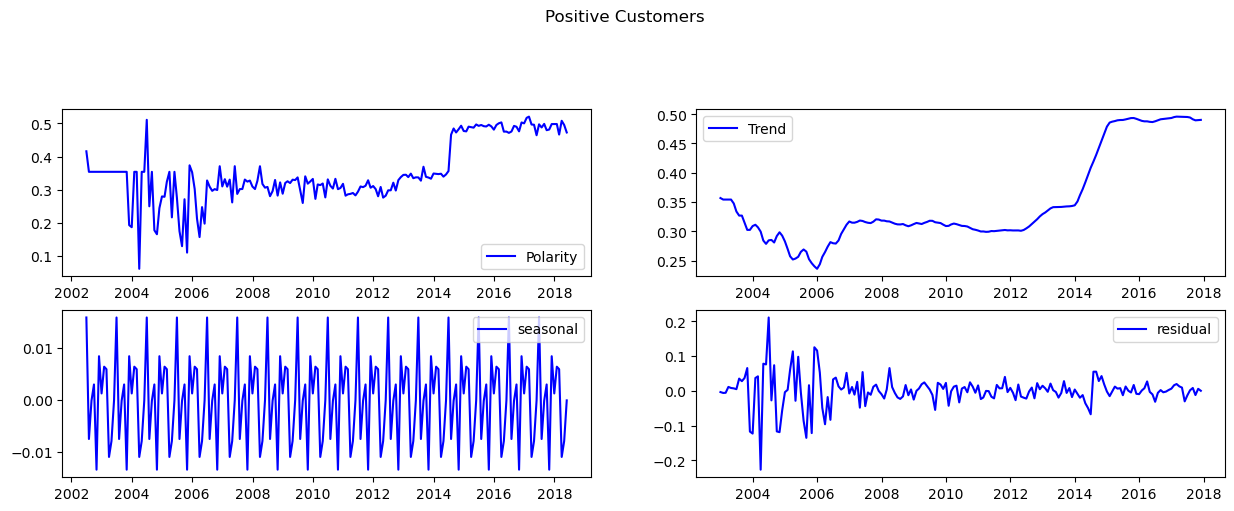

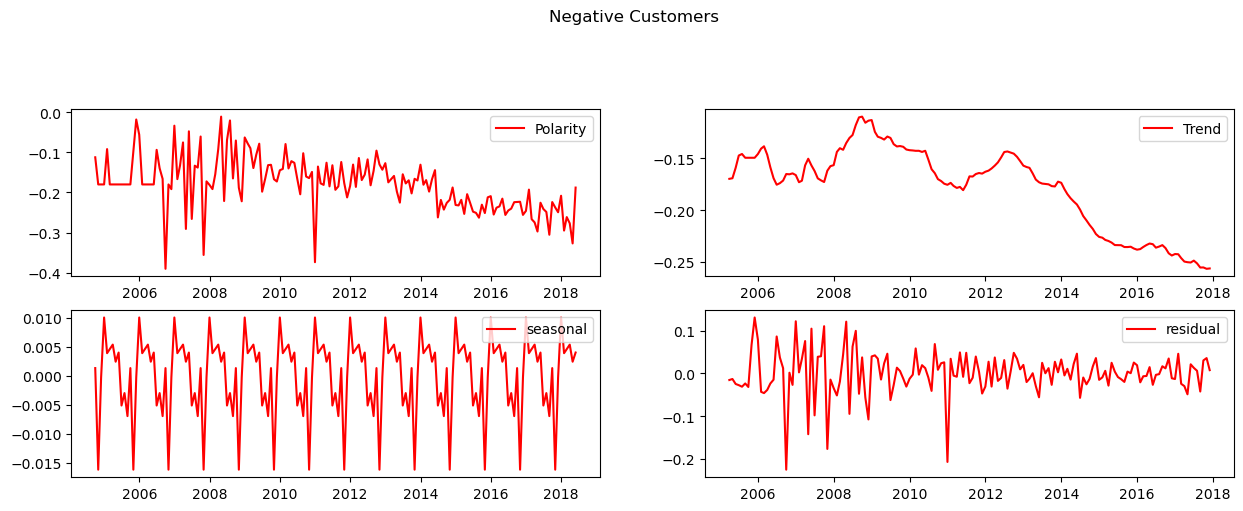

In [47]:
# Plotting seasonal decompose

import matplotlib.pyplot as plt

customers = {'Positive Customers': pos_m, 'Negative Customers': neg_m}

color, temp = ['blue', 'red'], 0
for title, customer in customers.items():
    decomposition = seasonal_decompose(customer, period = 12)
    trend, seasonal, residual = decomposition.trend, decomposition.seasonal, decomposition.resid

    plt.figure(figsize = (15, 10))
    plt.suptitle(title)

    plt.subplot(421)
    plt.plot(customer, label = 'Polarity', color = color[temp])
    plt.legend(loc = 'best')

    plt.subplot(422)
    plt.plot(trend, label = 'Trend', color = color[temp])
    plt.legend(loc = 'best')

    plt.subplot(423)
    plt.plot(seasonal, label = 'seasonal', color = color[temp])
    plt.legend(loc = 'best')

    plt.subplot(424)
    plt.plot(residual, label = 'residual', color = color[temp])
    plt.legend(loc = 'best')

    plt.show()
    temp +=1

# Observation

* **The polarity for both positive customers and negative customers are following seasonal pattern but not following unique trends - (additive, multiplicative )**

* **In negative part the trend is not neither additive or multiplicative, because it looks like its not following any trends** 

* **In this case we can build two models SARIMA - based on seasonal pattern and ARIMA -  based on trends**



### <center><font color = 'orange'>ARIMA model  <font color = 'green'>is a combination of Autoregressive (AR), Integrated (I), used to capture  the trend.
### <center><font color = 'green'>SARIMA model - <font color = 'orange'>best in capturing the seasonal patterns, since our data follows a seasonal pattern.

# Stationarity Check

In [39]:
# Importing dickey fuller test for stationarity check

from statsmodels.tsa.stattools import adfuller

In [40]:
# Checking stationarity for both posuitve and negative customers

null  = 'Data is not Stationary'

Alt = 'Data is Stationary'

for i in [pos_m, neg_m]:
    print(f'{ adfuller(i)[1]} : {Alt}' if  adfuller(i)[1] < 0.05 else f'{ adfuller(i)[1]} : {null} ')

0.8384704119941183 : Data is not Stationary 
0.9257710535183814 : Data is not Stationary 


* **from the results, we cannot say that our data is stationary for both customers**

In [41]:
# making data stationary - By differencing the values by lag 1

pos_diff = pos_m - pos_m.shift(1)        # Making Sationary for positive customers

pos_diff.fillna(pos_diff.mean(), inplace = True)

neg_diff = neg_m - neg_m.shift(1)        # Making Sationary for negative customers

neg_diff.fillna(neg_diff.mean(), inplace = True)

In [42]:
# Checking stationarity for both posuitve and negative customers

null  = 'Data is not Stationary'
                                                    # Here the value 0.05 is the level of significance
Alt = 'Data is Stationary'

for i in [pos_diff, neg_diff]:
    print(f'{ adfuller(i)[1]} : {Alt}' if  adfuller(i)[1] < 0.05 else f'{ adfuller(i)[1]} : {null} ')

0.006789336471210278 : Data is Stationary
1.0965414014584808e-09 : Data is Stationary


* **By using lag differencing method (lag 1) the data becomes stationary for both the customers**

## Auto Correlation

In [43]:
# Importoing plot_acf, plot_pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

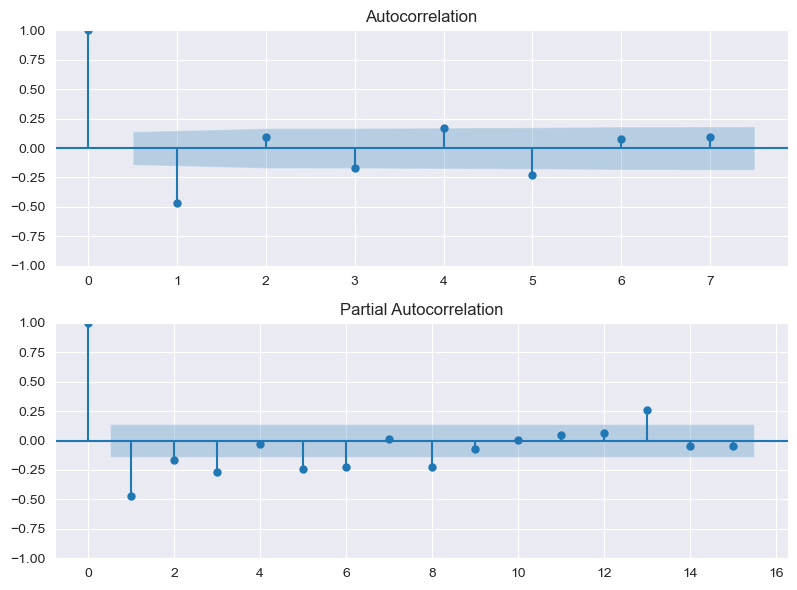

In [44]:
# checking the p and q values 

fig = plt.figure(figsize=(8, 6))

data = pos_diff

# Show ACF
ax1 = fig.add_subplot(211)
plot_acf(data, lags = 7, ax = ax1)

# Show PACF
ax2 = fig.add_subplot(212)
plot_pacf(data, lags = 15, ax = ax2)

plt.tight_layout()

# Observations

* ***From the ACF plot, we can see that there is a strong negative correlation at lag 1, and no significant correlation at lag 2.And the high negative correlation suggests a seasonal effect occurring every one months*** 

* ***From the PACF plot, we can see that there is a complex pattern in the data, with both positive and negative correlations at different lags.***

* ***Base on this conclusion - we can use SARIMA model, to capture the seasonal pattern and any remaining trends or irregularities.***

### Spliting

In [45]:
# Split the data into training and testing sets

train_data = data.iloc[:-12] 

test_data = data.iloc[-12:] 

### SARIMA model - positive customers

                                      SARIMAX Results                                      
Dep. Variable:                            Polarity   No. Observations:                  180
Model:             SARIMAX(2, 1, 4)x(0, 1, [], 12)   Log Likelihood                 202.591
Date:                             Fri, 05 May 2023   AIC                           -391.182
Time:                                     11:50:25   BIC                           -369.569
Sample:                                 06-30-2002   HQIC                          -382.407
                                      - 05-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5811      0.056    -28.203      0.000      -1.691      -1.471
ar.L2         -0.7041      

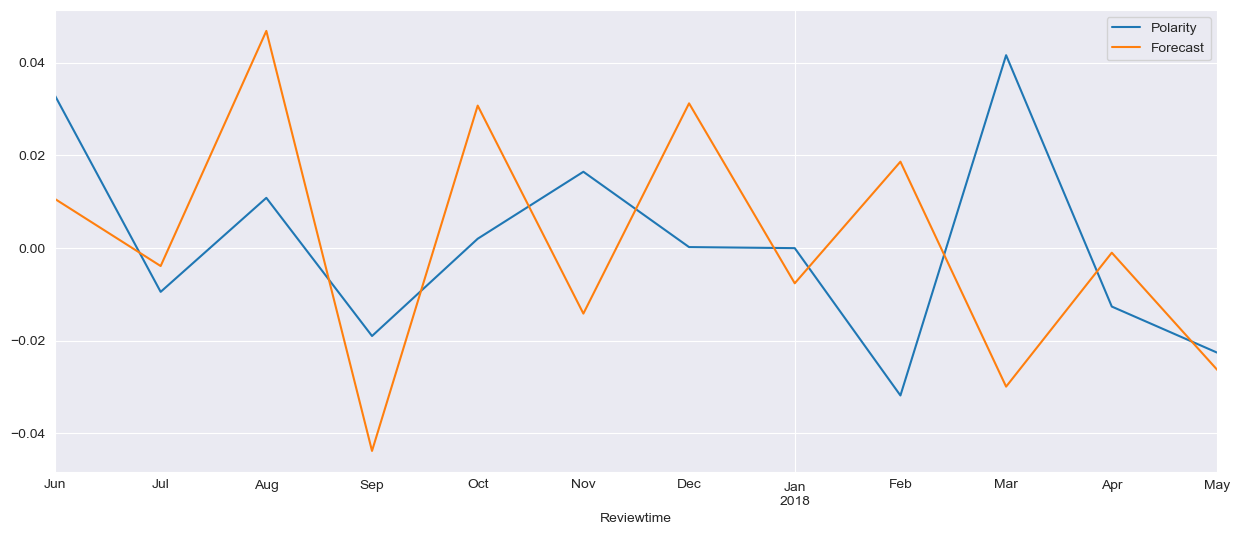

In [48]:
#Importing sarima model

import statsmodels.api as sm

# building sarima model

sarima = sm.tsa.statespace.SARIMAX(train_data, order = (2, 1, 4), seasonal_order = (0, 1, 0, 12), 
                                   enforce_stationarity = False, enforce_invertibility = False).fit()

print(sarima.summary())

# Predicting the values for the test data

test_data['Forecast'] = sarima.forecast(steps = len(test_data))

# Calculating MSE - Mean Squared error 

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(test_data.Polarity, test_data.Forecast)

print("\nMSE",MSE)

print("\nRMSE", np.sqrt(MSE))

# Evaluating ljung box test

print("\n",sm.stats.acorr_ljungbox(sarima.resid, lags = [1], return_df = True))

pvalue = sm.stats.acorr_ljungbox(sarima.resid, lags = [1], return_df = True)['lb_pvalue'].values

print(f"\n{pvalue}\nThe model is bad" if pvalue < 0.05 else f"P_value = {pvalue}\n  The model is Good")

# plotting the difeerence between actual and predicted

test_data.plot(figsize = (15,6))

plt.show()

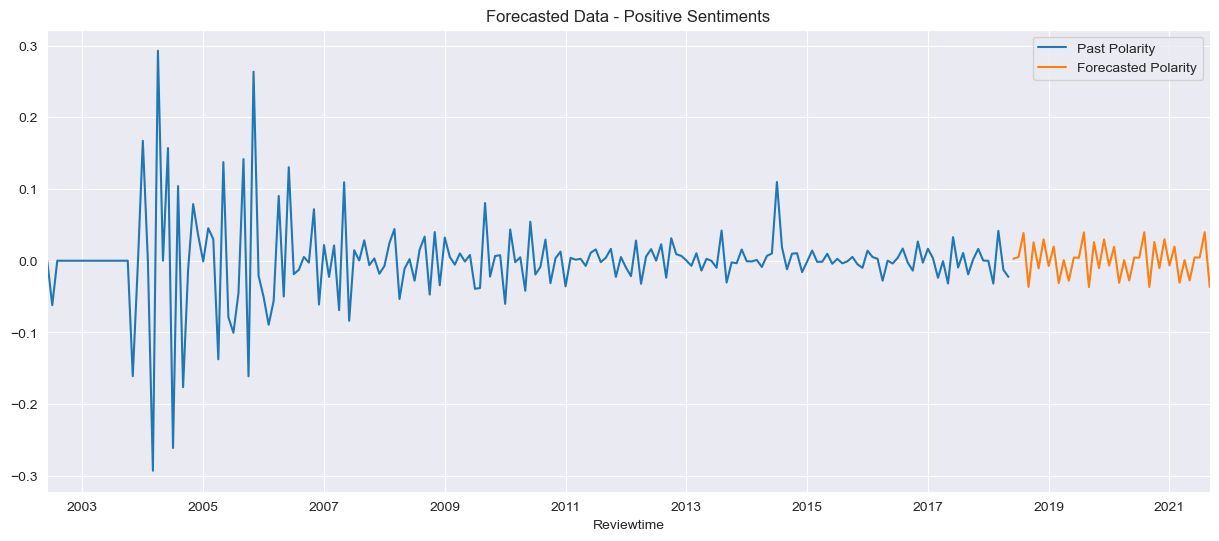

In [49]:
# Forecast the model for next 40 periods

forecast = sarima.predict(len(pos_diff), len(pos_diff) + 39)

# Plot the actual and forecasted data

pos_diff['Polarity'].plot(label = 'Past Polarity', figsize = (15, 6))

forecast.plot(label = 'Forecasted Polarity')

plt.title("Forecasted Data - Positive Sentiments")

plt.legend()

plt.show()

### ARIMA model - positive customers

                               SARIMAX Results                                
Dep. Variable:               Polarity   No. Observations:                  180
Model:                 ARIMA(2, 1, 4)   Log Likelihood                 278.534
Date:                Fri, 05 May 2023   AIC                           -543.067
Time:                        11:51:02   BIC                           -520.755
Sample:                    06-30-2002   HQIC                          -534.020
                         - 05-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2771      0.119    -10.723      0.000      -1.510      -1.044
ar.L2         -0.7067      0.138     -5.119      0.000      -0.977      -0.436
ma.L1         -0.3701      0.128     -2.897      0.0

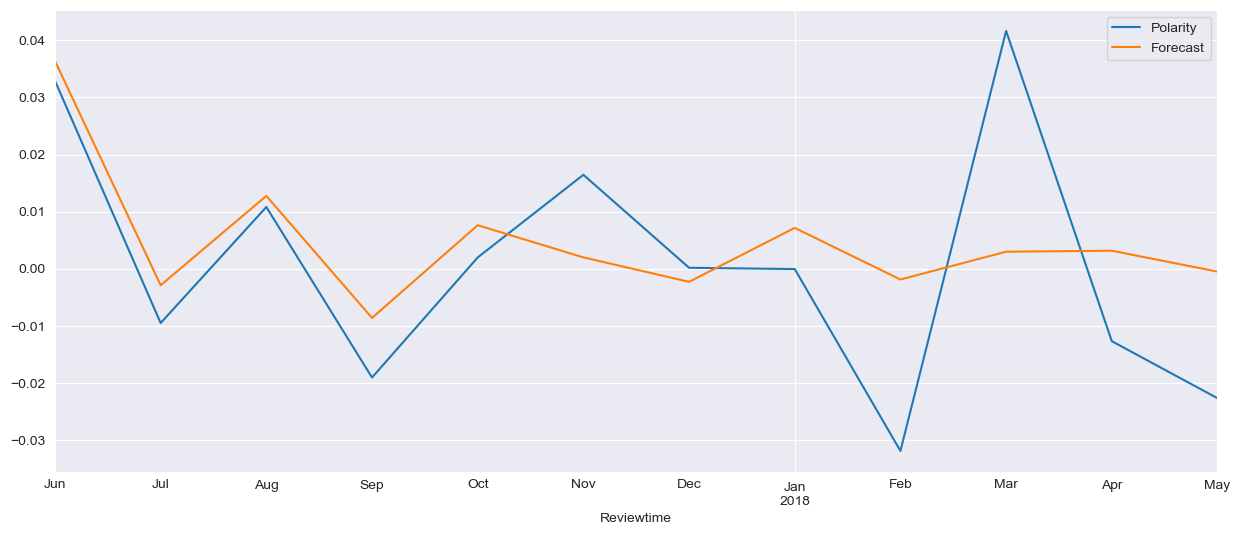

In [50]:
# importing arima model

from statsmodels.tsa.arima.model import ARIMA

# Building the ARIMA model

arima = ARIMA(train_data, order = (2, 1, 4)) 

arima_fit = arima.fit()

# Summary of the model

print(arima_fit.summary())

# forecasting the next 12 months

test_data['Forecast'] = arima_fit.forecast(len(test_data))

# Calculating MSE - Mean Squared error 

MSE = mean_squared_error(test_data.Polarity, test_data.Forecast)

print("\nMSE",MSE)

print("\nRMSE", np.sqrt(MSE))

# Evaluating ljung box test

print(sm.stats.acorr_ljungbox(arima_fit.resid, lags = [1], return_df = True))

pvalue = sm.stats.acorr_ljungbox(arima_fit.resid, lags = [1], return_df = True)['lb_pvalue'].values

print(f"\n{pvalue}\nThe model is bad" if pvalue < 0.05 else f"P_value = {pvalue}\n  The model is Good")

test_data.plot(figsize = (15,6))

plt.show()

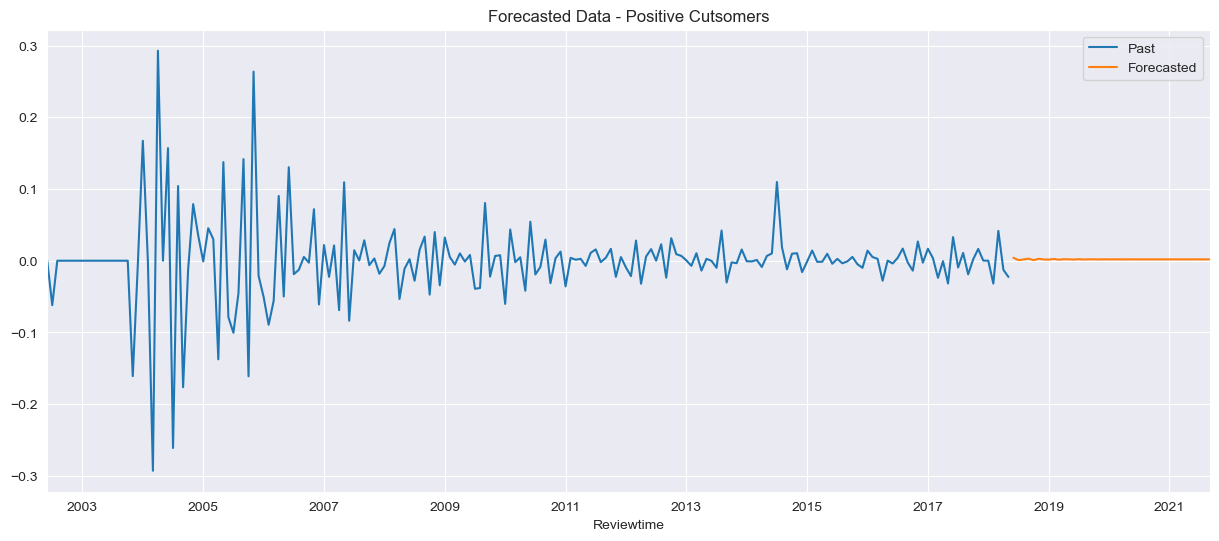

In [51]:
# Forecast the model for next 40 periods

forecast = arima_fit.predict(len(pos_diff), len(pos_diff) + 39)

# Plot the actual and forecasted data

pos_diff['Polarity'].plot(label = 'Past', figsize = (15, 6))

forecast.plot(label = 'Forecasted')

plt.title("Forecasted Data - Positive Cutsomers")
plt.legend()

plt.show()

# Observations

**Based on the AIC value, MSE, and RMSE of both the models, it appears that the SARIMA and ARIMA model is a good fit for the data. The AIC value of both are greater than -500 (i.e -ve indicated lower aic value) indicates that the model is better than other potential models with lower AIC values. The MSE and RMSE values are relatively low, indicating that the model is accurately predicting the values of the test set.**

**Furthermore, the Ljung-Box test returned a p-value of 0.8(SARIMA) and 0.9(ARIMA), which is greater than 0.05(level of significance). This means the model is a good fit for the data.**

# Drawbacks

**But in the plot we can notice that at the end of the year we can see some huge difference and the model follow the pattern slightly, it is because of the data limitations**

* **Reason :**

**In seasonal decompose we can see that at first the values are in decreasing pattern and after few years the pattern started to increase and follows additive patern and after it started to multiply**

**The model was able to cature the patterns before it started to multiply, due to system requirements we choose to only fetch 1 lakh records seems like we need to fetch more records to make the model to capture the pattern of each variations**

# Building sarima model for negative customers

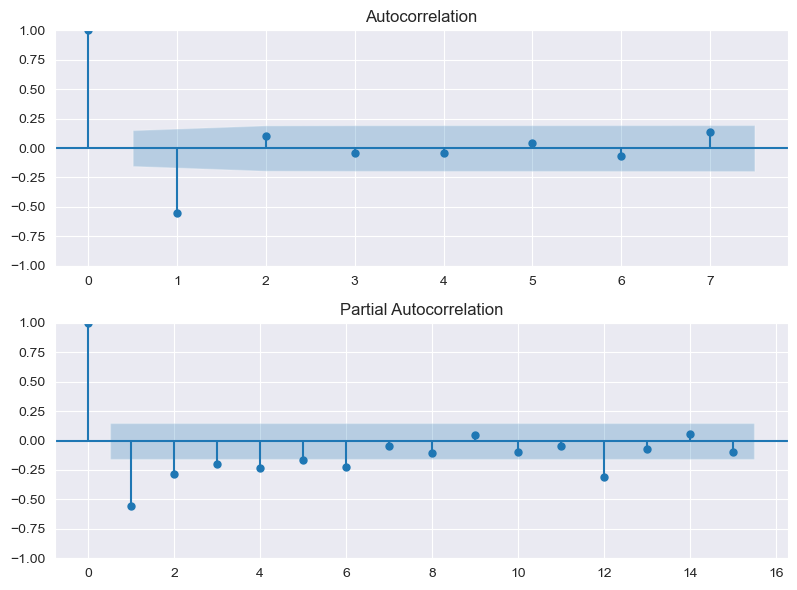

In [52]:
# Plotting the acf and pacf 

fig = plt.figure(figsize=(8, 6))

data = neg_diff #  here we are using the negative customers data which is sationary by lag 1 differencing

# Show ACF
ax1 = fig.add_subplot(211)
plot_acf(data, lags = 7, ax = ax1)

# Show PACF
ax2 = fig.add_subplot(212)
plot_pacf(data, lags = 15, ax = ax2)

plt.tight_layout()

# Observations

* ***From the ACF plot, we can see that there is a strong negative correlation at lag 1, and no significant correlation at lag 2.And the high negative correlation suggests a seasonal effect occurring every one months - same as postitve customers*** 

* ***From the PACF plot, we can see that there is a  pattern in the data, with most of the lags follow negative correlations at different lags and at lag 7 it became significant.***

In [53]:
# Split the data into training and testing sets

train_data = data.iloc[:-12] 

test_data = data.iloc[-12:] 

                                      SARIMAX Results                                      
Dep. Variable:                            Polarity   No. Observations:                  153
Model:             SARIMAX(2, 1, 6)x(0, 1, [], 12)   Log Likelihood                 144.987
Date:                             Fri, 05 May 2023   AIC                           -271.973
Time:                                     11:51:49   BIC                           -245.960
Sample:                                 09-30-2004   HQIC                          -261.402
                                      - 05-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2307      0.419     -2.935      0.003      -2.053      -0.409
ar.L2         -0.5153      

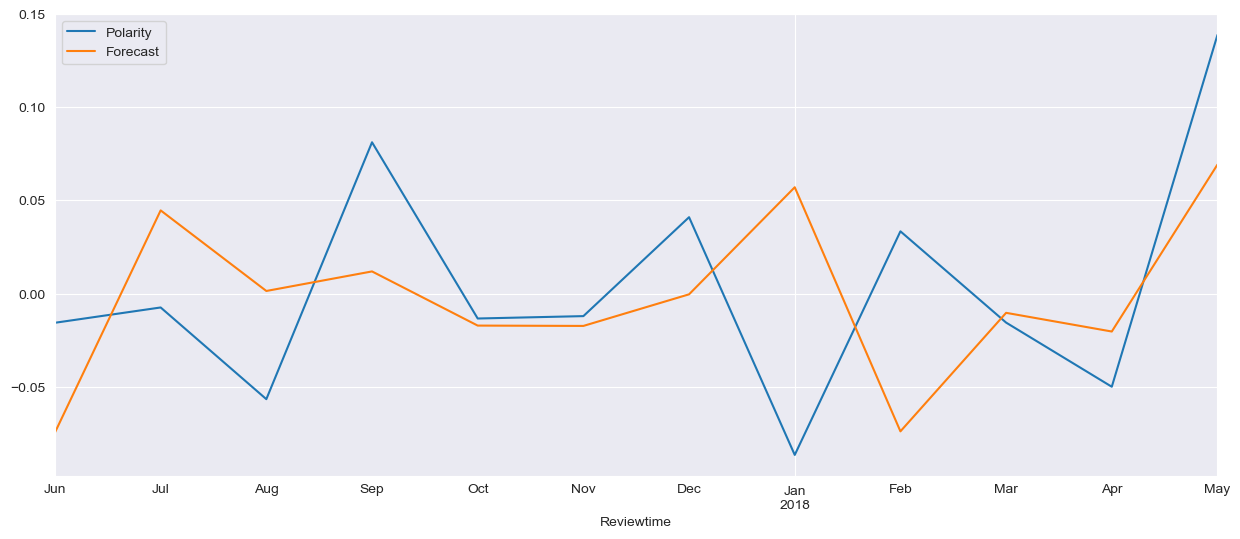

In [54]:
# building sarima model for negative customers

sarima = sm.tsa.statespace.SARIMAX(train_data, order = (2, 1, 6), seasonal_order = (0, 1, 0, 12), 
                                   enforce_stationarity = False, enforce_invertibility = False).fit()

print(sarima.summary())

# Predicting the values for the test data

test_data['Forecast'] = sarima.forecast(steps = len(test_data))

# Calculating MSE - Mean Squared error 

MSE = mean_squared_error(test_data.Polarity, test_data.Forecast)

print("\nMSE",MSE)

print("\nRMSE", np.sqrt(MSE))

# Evaluating ljung box test

print(sm.stats.acorr_ljungbox(sarima.resid, lags = [1], return_df = True))

pvalue = sm.stats.acorr_ljungbox(sarima.resid, lags = [1], return_df = True)['lb_pvalue'].values

print(f"\n{pvalue}\nThe model is bad" if pvalue < 0.05 else f"P_value = {pvalue}\n  The model is Good")

# plotting the difeerence between actual and predicted

test_data.plot(figsize = (15,6))

plt.show()

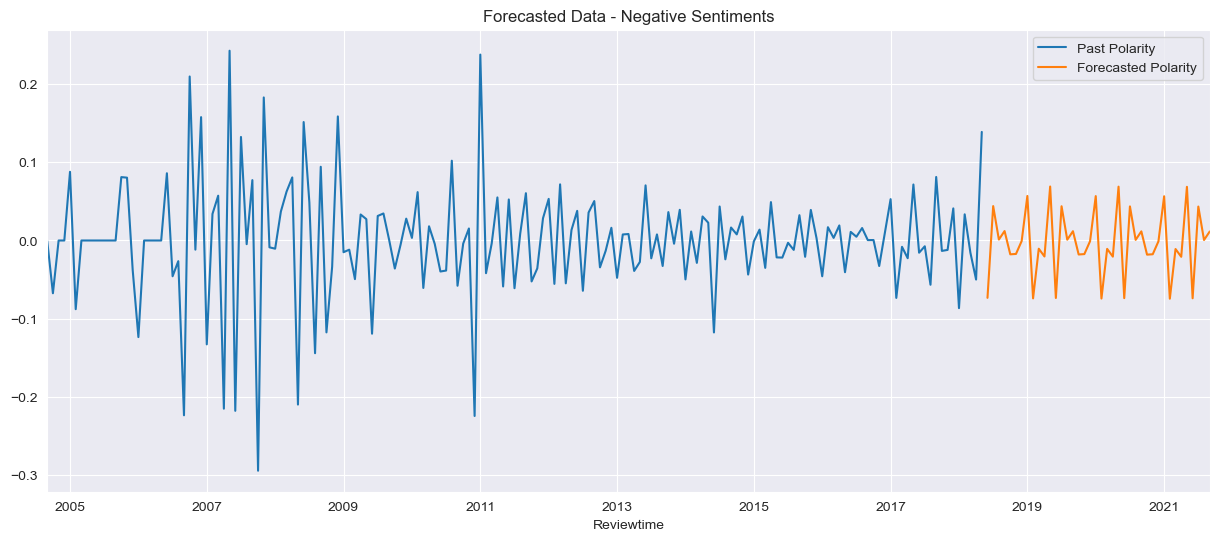

In [55]:
# Forecast the model for next 40 periods

forecast = sarima.predict(len(neg_diff), len(neg_diff) + 39)

# Plot the actual and forecasted data

neg_diff['Polarity'].plot(label = 'Past Polarity', figsize = (15, 6))

forecast.plot(label = 'Forecasted Polarity')

plt.title("Forecasted Data - Negative Sentiments")

plt.legend()

plt.show()

                               SARIMAX Results                                
Dep. Variable:               Polarity   No. Observations:                  153
Model:                 ARIMA(2, 1, 6)   Log Likelihood                 220.291
Date:                Fri, 05 May 2023   AIC                           -422.581
Time:                        11:52:17   BIC                           -395.366
Sample:                    09-30-2004   HQIC                          -411.526
                         - 05-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7365      0.220     -7.886      0.000      -2.168      -1.305
ar.L2         -0.7889      0.193     -4.082      0.000      -1.168      -0.410
ma.L1         -0.1680      0.256     -0.657      0.5

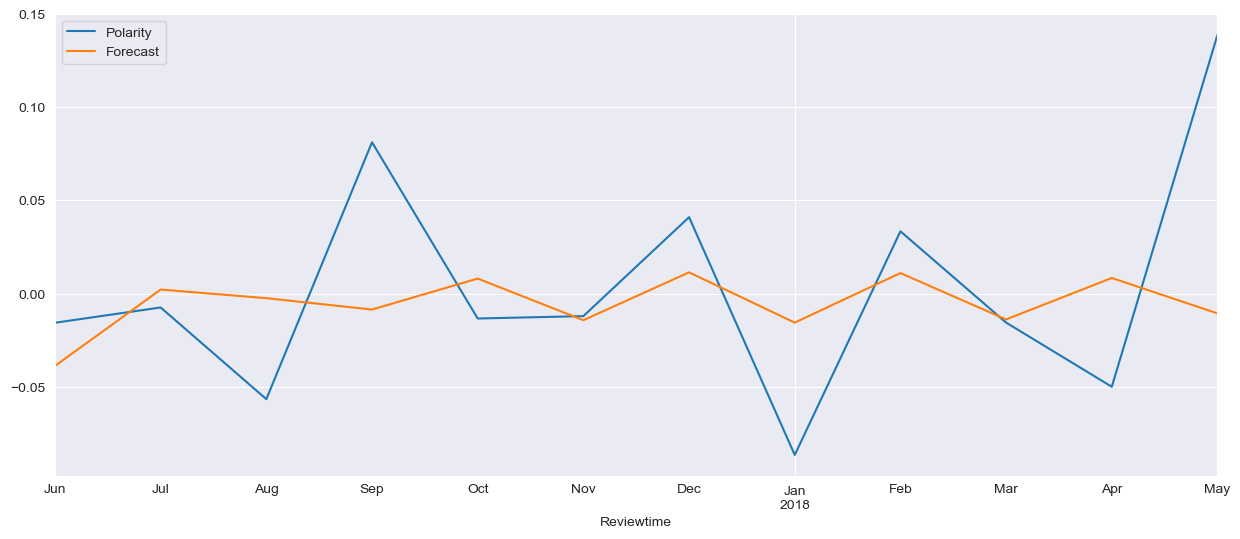

In [56]:
# Building the ARIMA model

arima = ARIMA(train_data, order = (2, 1, 6)) 

arima_fit = arima.fit()

# Summary of the model

print(arima_fit.summary())

# forecasting the next 12 months

test_data['Forecast'] = arima_fit.forecast(len(test_data))

# Calculating MSE - Mean Squared error 

MSE = mean_squared_error(test_data.Polarity, test_data.Forecast)

print("MSE",MSE)

print("RMSE", np.sqrt(MSE))

# Evaluating ljung box test

print(sm.stats.acorr_ljungbox(arima_fit.resid, lags = [1], return_df = True))

pvalue = sm.stats.acorr_ljungbox(arima_fit.resid, lags = [1], return_df = True)['lb_pvalue'].values

print(f"{pvalue}\nThe model is bad" if pvalue < 0.05 else f"P_value = {pvalue}\n  The model is Good")

# plotting the difeerence between actual and predicted

test_data.plot(figsize = (15,6))

plt.show()

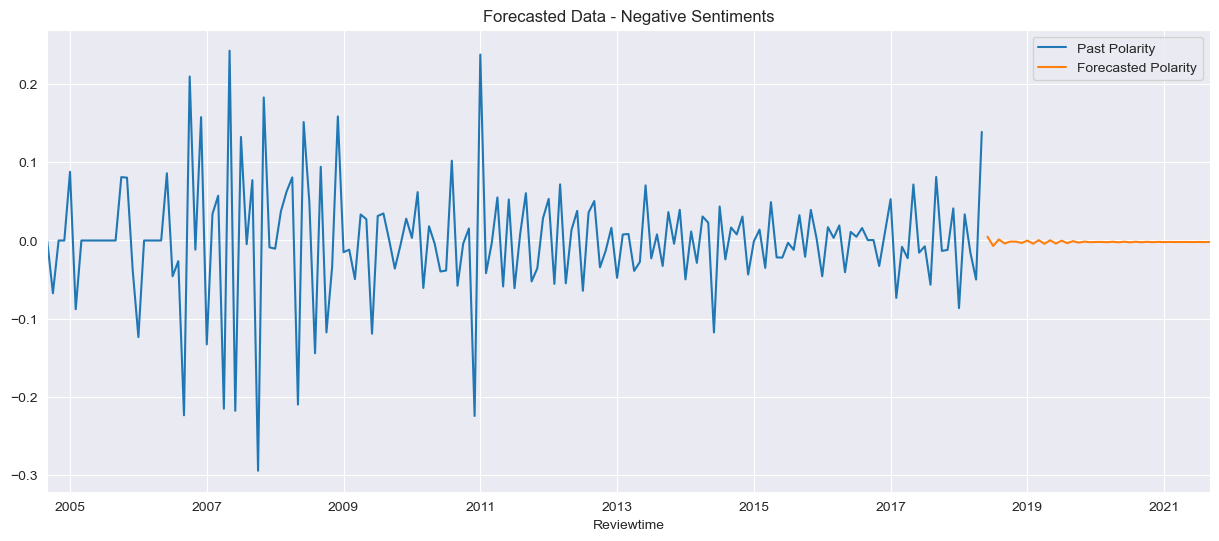

In [57]:
# Forecast the model for next 40 periods

forecast = arima_fit.predict(len(neg_diff), len(neg_diff) + 39)

# Plot the actual and forecasted data

neg_diff['Polarity'].plot(label = 'Past Polarity', figsize = (15, 6))

forecast.plot(label = 'Forecasted Polarity')

plt.title("Forecasted Data - Negative Sentiments")

plt.legend()

plt.show()

# Observations

**Based on the AIC value, MSE, and RMSE of both the models, it appears that the SARIMA and ARIMA model is a good fit for the data. The AIC value indicates that the model is better than other potential models with lower AIC values. The MSE and RMSE values are relatively low, indicating that the model is accurately predicting the values of the test set.**

**Also, the Ljung-Box test returned a p-value of 0.63(SARIMA) and 0.69(ARIMA), which is greater than 0.05(level of significance). This means the model is a good fit for the data.**

**But the results are same as the postive customers, thw models can able to understand the patterns but not able to adapt for the new patterns without much records**

# Conclusion

* **Based on the analysis performed on the two time series models for positive and negative customers, it can be concluded that the models are performing well. The metrics such as RMSE, AIC, MSE, and Ljung-Box test have shown that the models have good accuracy and are able to capture the underlying patterns in the data.**

* **But, due to the limitations of data, the models are not able to capture all the patterns that are new in the data, which has resulted in some errors between the actual and predicted data.**

* **Overall, the models provide a good starting point for forecasting the future behavior of positive and negative customers.**

* **we'll update the models and capture all the patterns as more data becomes available, in order to improve their accuracy and capture more complex patterns in the data.**

# <center><font color = 'orange'>Frequent Product - <font color = 'green'>product in demand

### <center><font color = 'green'>The product bought by most customers

In [373]:
# finding the most frequent product

Grocery['Product_id'].value_counts(ascending = False)[:5]

B000F4DKAI    2918
B000E1FZHS    2548
B000EVMNMI    1290
B00014JNI0    1198
B0009F3PM6    1088
Name: Product_id, dtype: int64

**The top 5 products bought by the customers are above**

In [58]:
# Creating a subset of records that belong to B000F4DKAI - product id

freq_prod = Grocery[Grocery['Product_id'] == 'B000F4DKAI']

# sahpe of the subset - B000F4DKAI    
  
print(f"In grocery_review data there are totally {freq_prod.shape[0]} Records and {freq_prod.shape[1]} Features") 

# Preview of the subset - B000F4DKAI    

freq_prod.head()

In grocery_review data there are totally 2918 Records and 14 Features


,Rating,Verified,Reviewtime,Reviewerid,Product_id,Review,Sentiments,Category,Price,Polarity,Sentiment_negative,Sentiment_neutral,Sentiment_positive,Cluster
68250,5,True,2018-05-15,AVOLEOSKPOCQ0,B000F4DKAI,good,positive,Grocery,23.70,0.70,0,0,1,0
68251,5,True,2018-05-15,A3DUILUXSBIZ8,B000F4DKAI,wonderful tea,positive,Grocery,23.70,1.00,0,0,1,0
68252,4,True,2018-05-14,A3JYF40RM4NCGD,B000F4DKAI,husband start drink tea instead coffee like ch...,positive,Grocery,23.70,0.29,0,0,1,0
68253,5,True,2018-05-12,A1A8F0W99H6J9K,B000F4DKAI,good english breakfast tea,positive,Grocery,23.70,0.35,0,0,1,0
68254,5,True,2018-05-12,A2ZATUWQ4G39KR,B000F4DKAI,long price reasonable order subscribe save ill...,negative,Grocery,23.70,-0.12,1,0,0,1


In [59]:
# For time series we are going to use date and polarity

freq_prod = freq_prod[['Polarity', 'Reviewtime', 'Sentiments']]

In [60]:
# Creating subset based on positive anbd negative customers

pos_prod = freq_prod.loc[freq_prod['Sentiments'] == 'positive', ['Polarity', 'Reviewtime']]

neg_prod = freq_prod.loc[freq_prod['Sentiments'] == 'negative', ['Polarity', 'Reviewtime']]

pos_prod.set_index('Reviewtime', inplace = True)

pos_prod.index = pd.to_datetime(pos_prod.index)

pos_prod.sort_index(inplace = True)

neg_prod.set_index('Reviewtime', inplace = True)

neg_prod.index = pd.to_datetime(neg_prod.index)

neg_prod.sort_index(inplace = True)

In [61]:
difference1 = pos_prod.index.to_series().diff()

difference2 = neg_prod.index.to_series().diff()

print(difference1, difference2)

Reviewtime
2004-12-28        NaT
2006-07-26   575 days
2006-07-30     4 days
2006-08-02     3 days
2006-08-29    27 days
               ...   
2018-05-08     2 days
2018-05-12     4 days
2018-05-14     2 days
2018-05-15     1 days
2018-05-15     0 days
Name: Reviewtime, Length: 2555, dtype: timedelta64[ns] Reviewtime
2006-09-22        NaT
2006-09-22     0 days
2007-04-04   194 days
2007-12-21   261 days
2009-03-16   451 days
               ...   
2018-04-20     7 days
2018-04-23     3 days
2018-05-05    12 days
2018-05-05     0 days
2018-05-12     7 days
Name: Reviewtime, Length: 185, dtype: timedelta64[ns]


* **Most of the records are positive and only 14.5 % records are negative**

* **The difference between dates in the given sequence is not consistent, which means the time series may not have a fixed frequency. Also, 200 records may not be enough to capture all the information.**

In [62]:
# Reampling the data

pos_m = pos_prod.resample('m').mean()

neg_m = neg_prod.resample('m').mean()


pos_m.fillna(pos_m.mean(), inplace = True)

neg_m.fillna(neg_m.mean(), inplace = True)

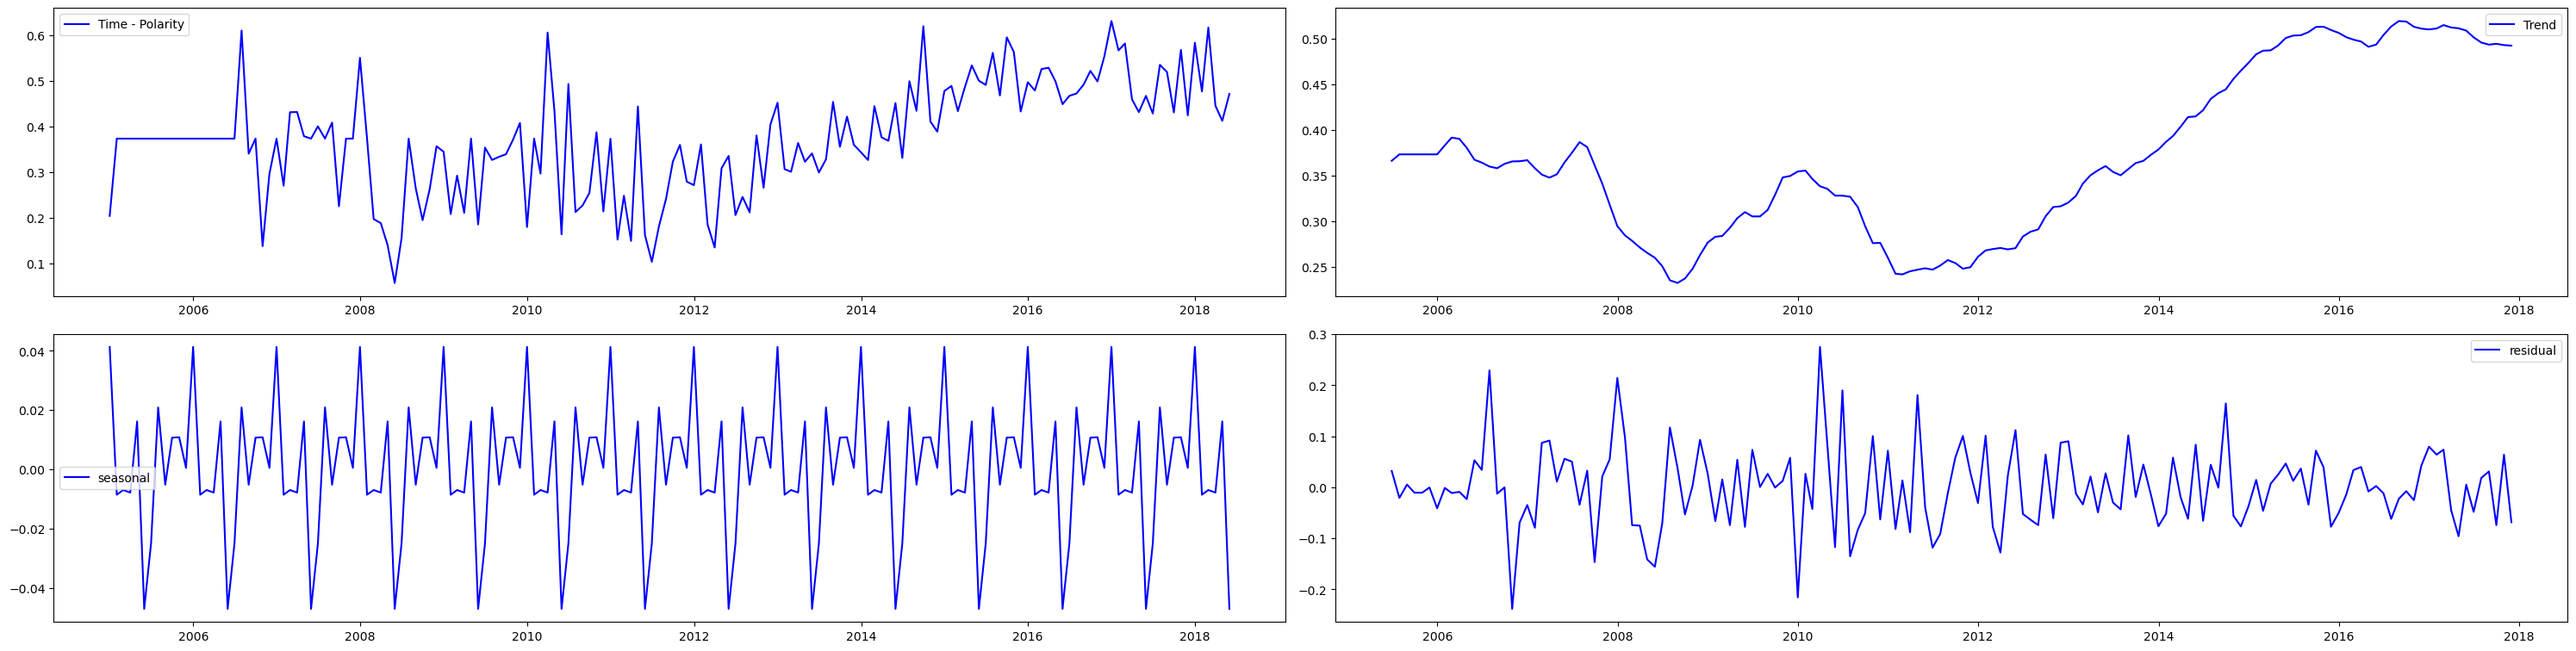

In [79]:
# Plotting all the 4 types of time series components

decomposition = seasonal_decompose(pos_m, period = 12)

d_trend, d_seasonal, d_residual = decomposition.trend, decomposition.seasonal, decomposition.resid

# plotting all the 4 graphs

plt.figure(figsize = (30,15))


plt.subplot(421)
plt.plot(pos_m, label = 'Time - Polarity', color = 'blue')
plt.legend(loc = 'best')

plt.subplot(422)
plt.plot(d_trend, label = 'Trend', color = 'blue')
plt.legend(loc = 'best')

plt.subplot(423)
plt.plot(d_seasonal, label = 'seasonal', color = 'blue')
plt.legend(loc = 'best')

plt.subplot(424)
plt.plot(d_residual, label = 'residual', color = 'blue')
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

**From the seasonal decompose we can see that there is no trend but seasonality is present and also the residual are very high inconsistent pattern**

In [63]:
# Checking stationarity for both posuitve and negative customers

null  = 'Data is not Stationary'

Alt = 'Data is Stationary'

for i in [pos_m, neg_m]:
    print(f'{ adfuller(i)[1]} : {Alt}' if  adfuller(i)[1] < 0.05 else f'{ adfuller(i)[1]} : {null} ')

0.5474455788980122 : Data is not Stationary 
1.2646510646587993e-07 : Data is Stationary


In [64]:
# making data stationary - By differencing the values by lag 1

pos_diff = pos_m - pos_m.shift(1)        # Making Sationary for positive customers

pos_diff.fillna(pos_diff.mean(), inplace = True)

neg_diff = neg_m - neg_m.shift(1)        # Making Sationary for negative customers

neg_diff.fillna(neg_diff.mean(), inplace = True)

In [65]:
# Checking stationarity for both posuitve and negative customers

null  = 'Data is not Stationary'

Alt = 'Data is Stationary'

for i in [pos_diff, neg_diff]:
    print(f'{ adfuller(i)[1]} : {Alt}' if  adfuller(i)[1] < 0.05 else f'{adfuller(i)[1]} : {null} ')

5.775296974417784e-14 : Data is Stationary
9.32753660655219e-14 : Data is Stationary


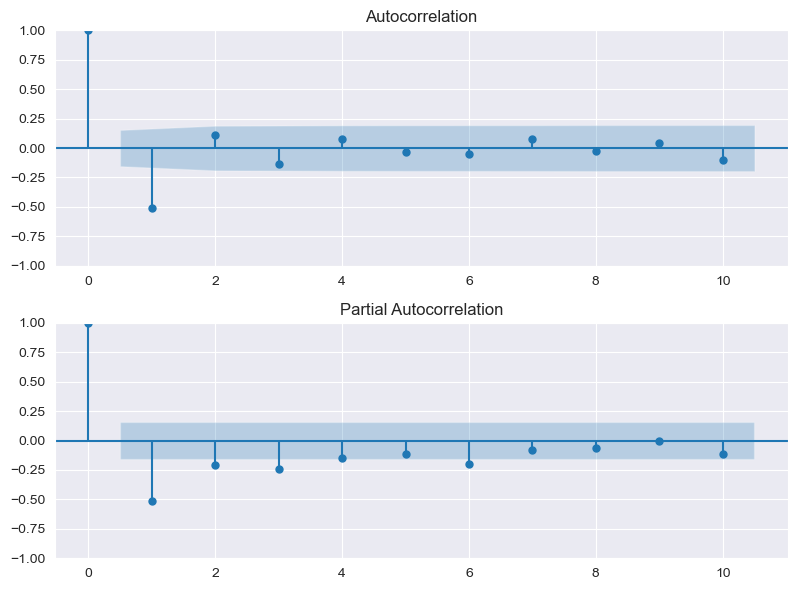

In [66]:
fig = plt.figure(figsize = (8, 6))

data = pos_diff

# Show ACF
ax1 = fig.add_subplot(211)
plot_acf(data, lags = 10, ax = ax1)

# Show PACF
ax2 = fig.add_subplot(212)
plot_pacf(data, lags = 10, ax = ax2)

plt.tight_layout()

# SARIMA model - Frequent bought products - Positive customers

In [84]:
# Split the data into training and testing sets

train_data = data.iloc[:-12] 

test_data = data.iloc[-12:] 

                                      SARIMAX Results                                      
Dep. Variable:                            Polarity   No. Observations:                  153
Model:             SARIMAX(2, 1, 6)x(0, 1, [], 12)   Log Likelihood                 144.987
Date:                             Fri, 05 May 2023   AIC                           -271.973
Time:                                     11:55:25   BIC                           -245.960
Sample:                                 09-30-2004   HQIC                          -261.402
                                      - 05-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2307      0.419     -2.935      0.003      -2.053      -0.409
ar.L2         -0.5153      

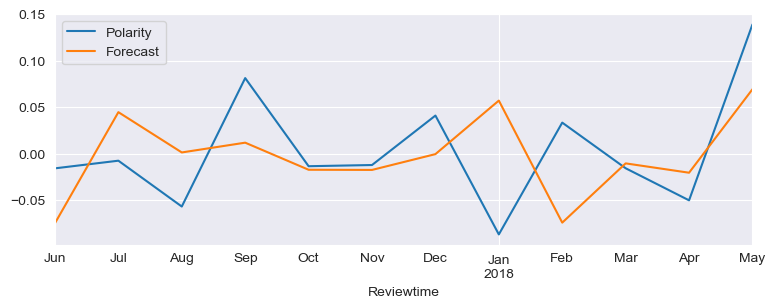

In [69]:
# building sarima model for positive customers - frequent product

sarima = sm.tsa.statespace.SARIMAX(train_data, order = (2, 1, 6), seasonal_order = (0, 1, 0, 12), 
                                   enforce_stationarity = False, enforce_invertibility = False).fit()

print(sarima.summary())

# Predicting the values for the test data

test_data['Forecast'] = sarima.forecast(steps = len(test_data))

test_data['Error'] = test_data.Polarity - test_data.Forecast

# Calculating MSE - Mean Squared error 

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(test_data.Polarity, test_data.Forecast)

print("\nMSE",MSE)

print("\nRMSE", np.sqrt(MSE))

# Evaluating ljung box test

print(sm.stats.acorr_ljungbox(sarima.resid, lags = [1], return_df = True))

pvalue = sm.stats.acorr_ljungbox(sarima.resid, lags = [1], return_df = True)['lb_pvalue'].values

print(f"\n{pvalue}\nThe model is bad" if pvalue < 0.05 else f"P_value = {pvalue}\n  The model is Good")

test_data[['Polarity', 'Forecast']].plot(figsize = (9,3))

plt.show()

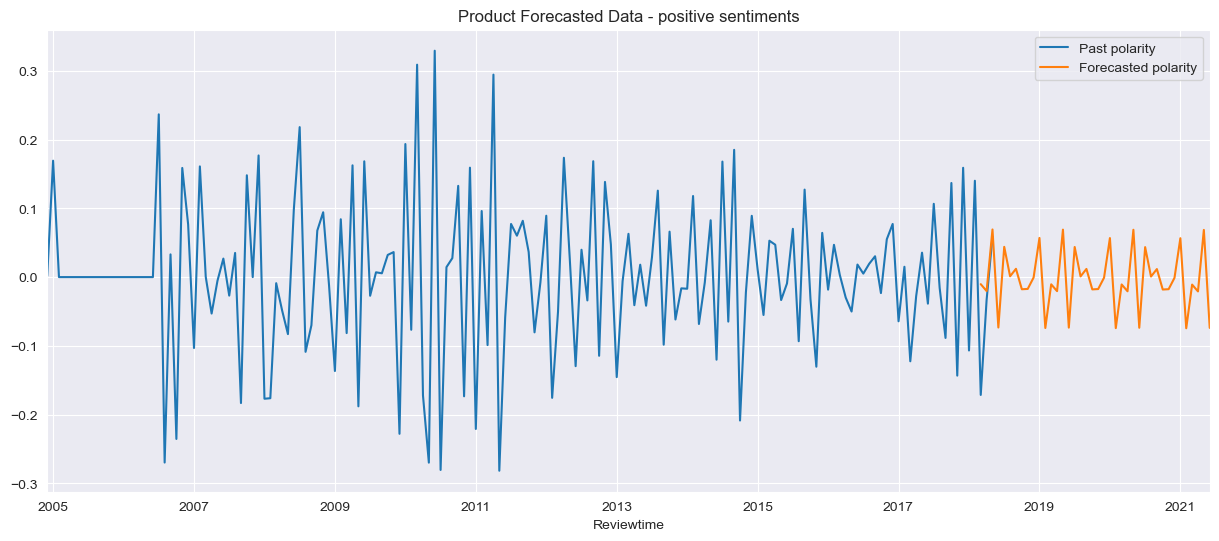

In [70]:
# Forecast the model for next 40 periods

forecast = sarima.predict(len(pos_diff), len(pos_diff) + 39)

# Plot the actual and forecasted data

pos_diff['Polarity'].plot(label = 'Past polarity', figsize = (15, 6))

forecast.plot(label = 'Forecasted polarity')

plt.title("Product Forecasted Data - positive sentiments")

plt.legend()

plt.show()

# Observations 
**The model appears to be performing well, with a low AIC value, close-to-zero MSE and RMSE values, and a non-significant Ljung-Box test result. These results suggest that the model is a good fit for the data.**

**Also, the predicted values follows the pattern of the actual data, comes with slight errors.**

---

# Negative Customers - For product

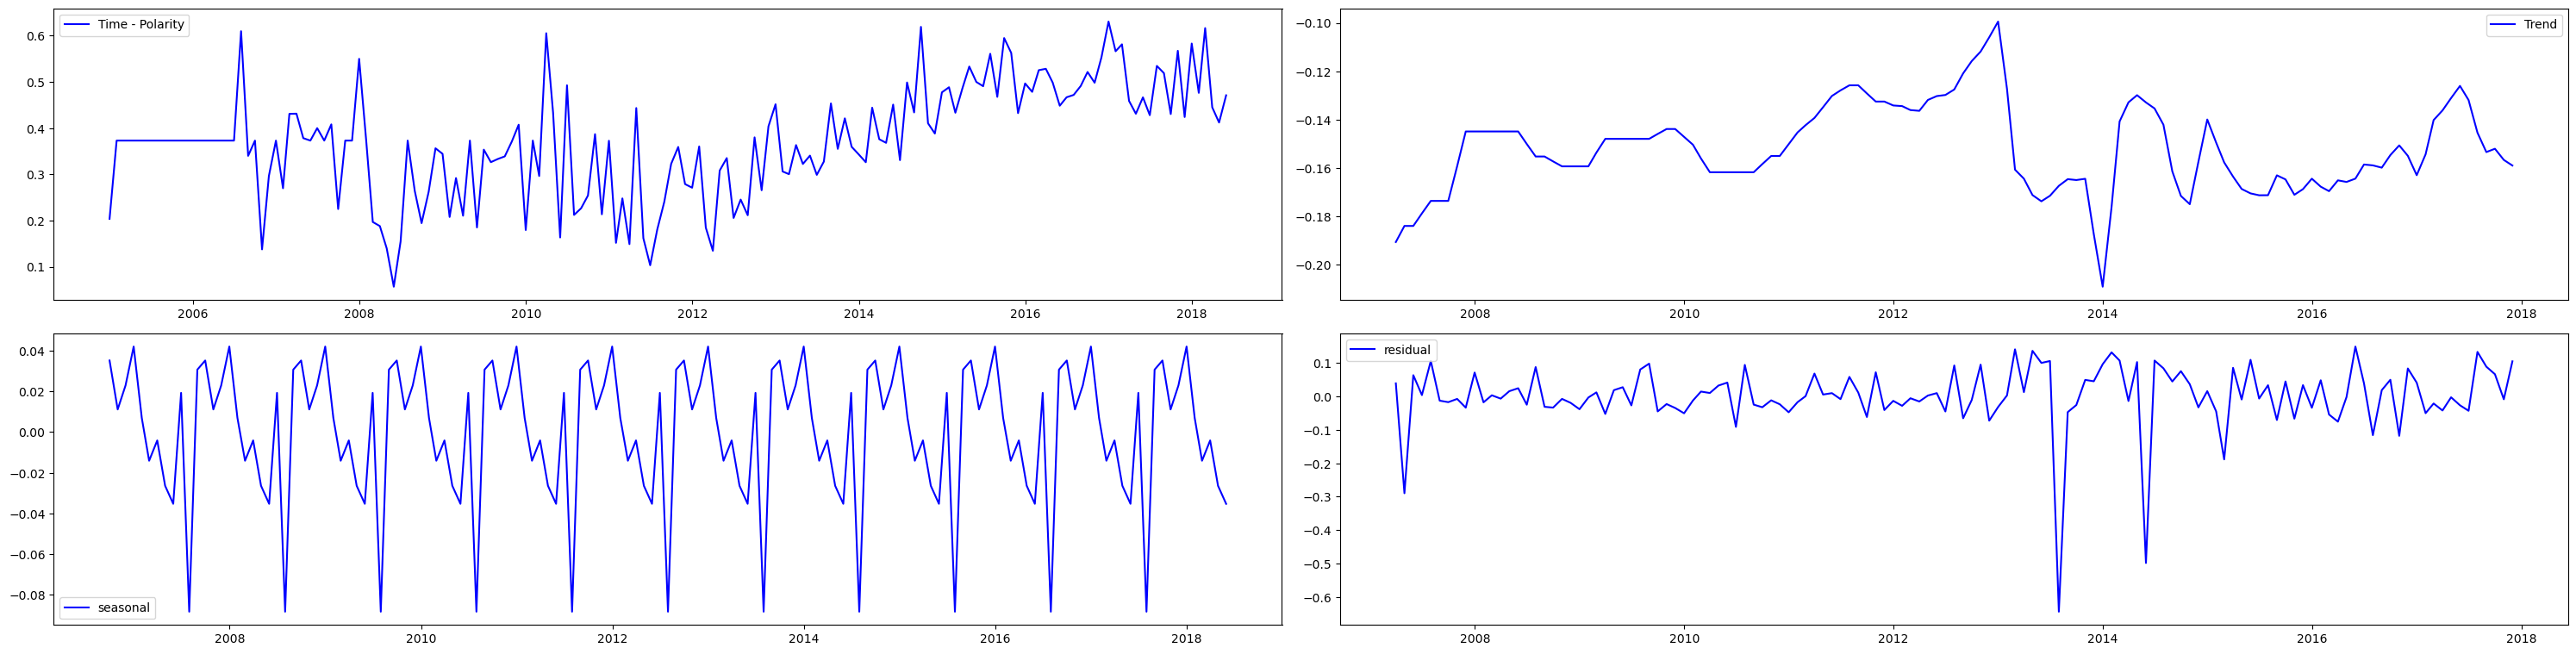

In [88]:
# Plotting all the 4 types of time series components

decomposition = seasonal_decompose(neg_m, period = 12)

d_trend, d_seasonal, d_residual = decomposition.trend, decomposition.seasonal, decomposition.resid

# plotting all the 4 graphs

plt.figure(figsize = (30,15))

plt.subplot(421)
plt.plot(pos_m, label = 'Time - Polarity', color = 'blue')
plt.legend(loc = 'best')

plt.subplot(422)
plt.plot(d_trend, label = 'Trend', color = 'blue')
plt.legend(loc = 'best')

plt.subplot(423)
plt.plot(d_seasonal, label = 'seasonal', color = 'blue')
plt.legend(loc = 'best')

plt.subplot(424)
plt.plot(d_residual, label = 'residual', color = 'blue')
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

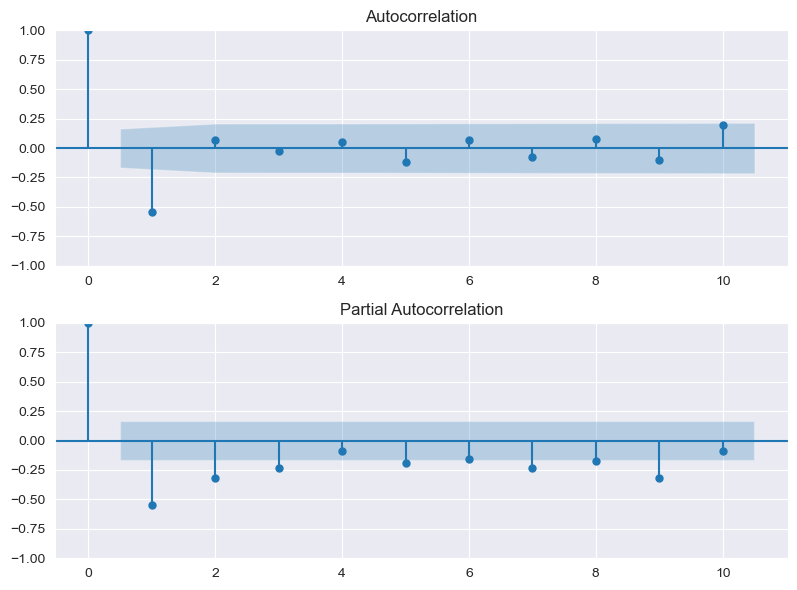

In [73]:
fig = plt.figure(figsize=(8, 6))

data = neg_diff

# Show ACF
ax1 = fig.add_subplot(211)
plot_acf(data, lags = 10, ax = ax1)

# Show PACF
ax2 = fig.add_subplot(212)
plot_pacf(data, lags = 10, ax = ax2)

plt.tight_layout()

# SARIMA model - Frequent bought products - Negative customers

In [72]:
# Split the data into training and testing sets

train_data = data.iloc[:-12] 

test_data = data.iloc[-12:] 

                                      SARIMAX Results                                      
Dep. Variable:                            Polarity   No. Observations:                  129
Model:             SARIMAX(2, 1, 4)x(0, 1, [], 12)   Log Likelihood                  55.320
Date:                             Fri, 05 May 2023   AIC                            -96.639
Time:                                     11:56:56   BIC                            -77.672
Sample:                                 09-30-2006   HQIC                           -88.945
                                      - 05-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0327      1.225     -0.027      0.979      -2.434       2.369
ar.L2          0.4948      

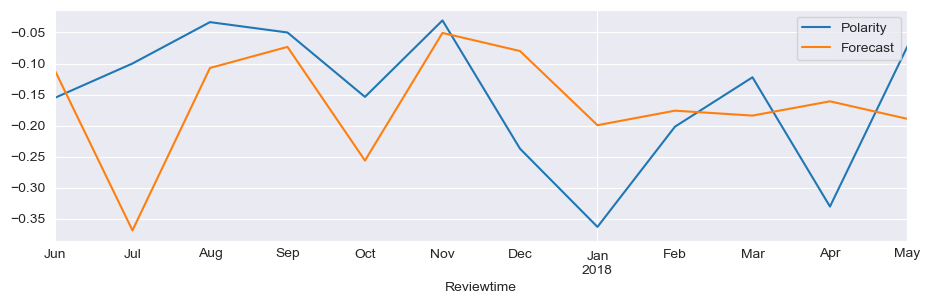

In [74]:
# building sarima model for Negative customers - frequent product

sarima = sm.tsa.statespace.SARIMAX(train_data, order = (2, 1, 4), seasonal_order = (0, 1, 0, 12), 
                                   enforce_stationarity = False, enforce_invertibility = False).fit()

print(sarima.summary())

# Predicting the values for the test data

test_data['Forecast'] = sarima.forecast(steps = len(test_data))

test_data['Error'] = test_data.Polarity - test_data.Forecast

# Calculating MSE - Mean Squared error 

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(test_data.Polarity, test_data.Forecast)

print("MSE",MSE)

print("RMSE", np.sqrt(MSE))

# Evaluating ljung box test

print(sm.stats.acorr_ljungbox(sarima.resid, lags = [1], return_df = True))

pvalue = sm.stats.acorr_ljungbox(sarima.resid, lags = [1], return_df = True)['lb_pvalue'].values

print(f"{pvalue}\nThe model is bad" if pvalue < 0.05 else f"P_value = {pvalue}\n  The model is Good")

test_data[['Polarity', 'Forecast']].plot(figsize = (11, 3))

plt.show()

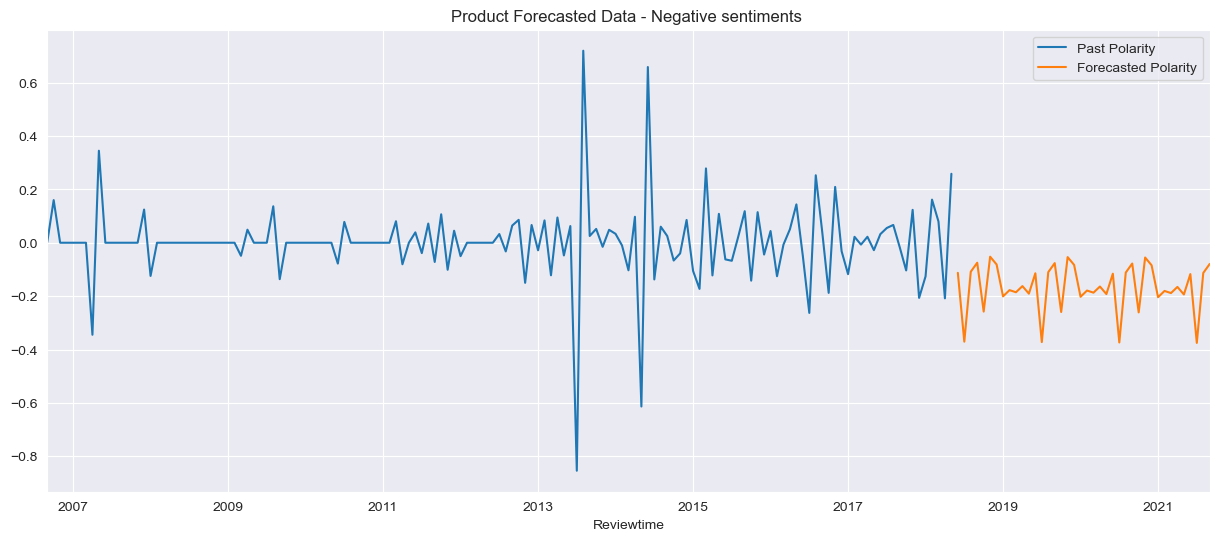

In [77]:
# Forecast the model for next 40 periods

forecast = sarima.predict(len(neg_diff), len(neg_diff) + 39)

# Plot the actual and forecasted data

neg_diff['Polarity'].plot(label = 'Past Polarity', figsize = (15, 6))

forecast.plot(label = 'Forecasted Polarity')

plt.title("Product Forecasted Data - Negative sentiments ")

plt.legend()

plt.show()

# Observations

* **As we mentioned earlier there are not much records for negative reviews, it is not possible to build a model with less data and also we can't trust the model.**

* **We can see that the scores are better, and ljung box test also suggest good model, though the results are not upto marks.**

* **Hence, this model is not trusted and also the model needs to be improved and gather a needed amount of data to capture the patterns.**

# <center><font color = 'green'>Supervised <font color = 'orange'>Learning - <font color = 'green'>ML

### <center> <font color = 'green'>In SL, we are going to build a ML model that predicts the class based on the features.In this section we are going to build classification models based on the performance of the model we are going to make some new predictions.

# Loading the data

In [3]:
# In this ml process we are going to use the Grocery data 

import pandas as pd

Grocery = pd.read_csv("Grocery_sentiments_dummy.csv")

# Data Understanding

#### Before model building, understand the data, check the imbalance, etc.

In [153]:
# Shape of the data file

print("There are totally \nRows : {} \ncolumns : {}".format(Grocery.shape[0],Grocery.shape[1]))

There are totally 
Rows : 82554 
columns : 14


In [42]:
# information about column names and their respective data types, missing values, and memory consumption 

Grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82554 entries, 0 to 82553
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              82554 non-null  int64  
 1   Verified            82554 non-null  bool   
 2   Reviewtime          82554 non-null  object 
 3   Reviewerid          82554 non-null  object 
 4   Product_id          82554 non-null  object 
 5   Review              82554 non-null  object 
 6   Sentiments          82554 non-null  object 
 7   Category            82554 non-null  object 
 8   Price               82554 non-null  float64
 9   Sentiment_negative  82554 non-null  int64  
 10  Sentiment_neutral   82554 non-null  int64  
 11  Sentiment_positive  82554 non-null  int64  
 12  Cluster             82554 non-null  int64  
 13  Polarity            82554 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 8.3+ MB


# Observations

* **First, thjere is no null counts, we have records for all entries**
* **Second, we have datetime column which is in object type, need to be converted**
* **Third, we have a continuous data for price catgeory**
* **we have three different datatypes =  boolean(1), continuous(2), descrete(5), object(6)**

In [44]:
# Statistical summary of the data

Grocery.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,82554.0,4.485016,1.035568,1.0,4.00,5.00,5.00,5.00
Price,82554.0,21.824737,18.011950,1.3,10.49,17.89,28.68,590.79
Sentiment_negative,82554.0,0.084006,0.277398,0.0,0.00,0.00,0.00,1.00
Sentiment_neutral,82554.0,0.084151,0.277616,0.0,0.00,0.00,0.00,1.00
Sentiment_positive,82554.0,0.831843,0.374008,0.0,1.00,1.00,1.00,1.00
Cluster,82554.0,0.252162,0.597153,0.0,0.00,0.00,0.00,2.00
Polarity,82554.0,0.356112,0.320070,-1.0,0.13,0.35,0.58,1.00


# Observations

* **From the summary statistics, The dataset has 82554 records and includes features such as Rating, Price, Sentiment (Negative, Neutral, Positive), Cluster, and Polarity.**

* **The data shows that the average product rating was 4.48 out of 5, and the average price of a product was  $21.82,**

* **Sentiments column and cluster column are categorical columns**

* **In Price column we cna see a presence of outliers, need to be treated for better model results**

In [48]:
# Checking for null values

print(f'Total no of null records = {Grocery.isna().sum().sum()}')

Total no of null records = 0


# Observations 

* **There is no trace of missing records in our dataset**

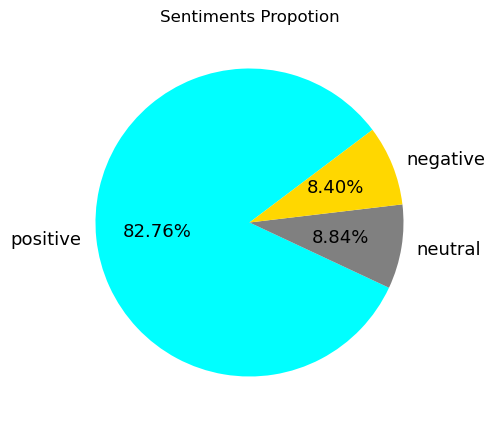

In [9]:
# Checking imbalance - visually

import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))

Grocery['Sentiments'].value_counts().plot(kind = 'pie', colors = ['cyan', 'grey', 'gold'], autopct = '%.2f%%', startangle = 37, textprops={'fontsize': 13})

plt.title('Sentiments Propotion')

plt.ylabel('') 

plt.show()

# Observations

* **From this plot, it is clear that more tha 80% of the customer sentiments are positive. It's great to see that more than 80% of customers have positive sentiments towards the products**

In [7]:
# converting Reviewtime to date time format

Grocery['Reviewtime'] = pd.to_datetime(Grocery['Reviewtime'], infer_datetime_format = True)

# Label encoding - Converting the categorical to numerical

In [5]:
# importing lavel encoder

from sklearn.preprocessing import LabelEncoder

In [6]:
# Label encoding for categorical columns

lc = ['Verified', 'Sentiments', 'Category']

# using for loop to encode the categorical columns

for i in lc:
    Grocery[i] = LabelEncoder().fit_transform(Grocery[i])
    print(i)
    print(Grocery[i].unique())
    print('--'*25)

Verified
[1 0]
--------------------------------------------------
Sentiments
[1 2 0]
--------------------------------------------------
Category
[2 1 3 4 0 5]
--------------------------------------------------


**Here we can see that all the categorical columns are converted to unique numeric variables**

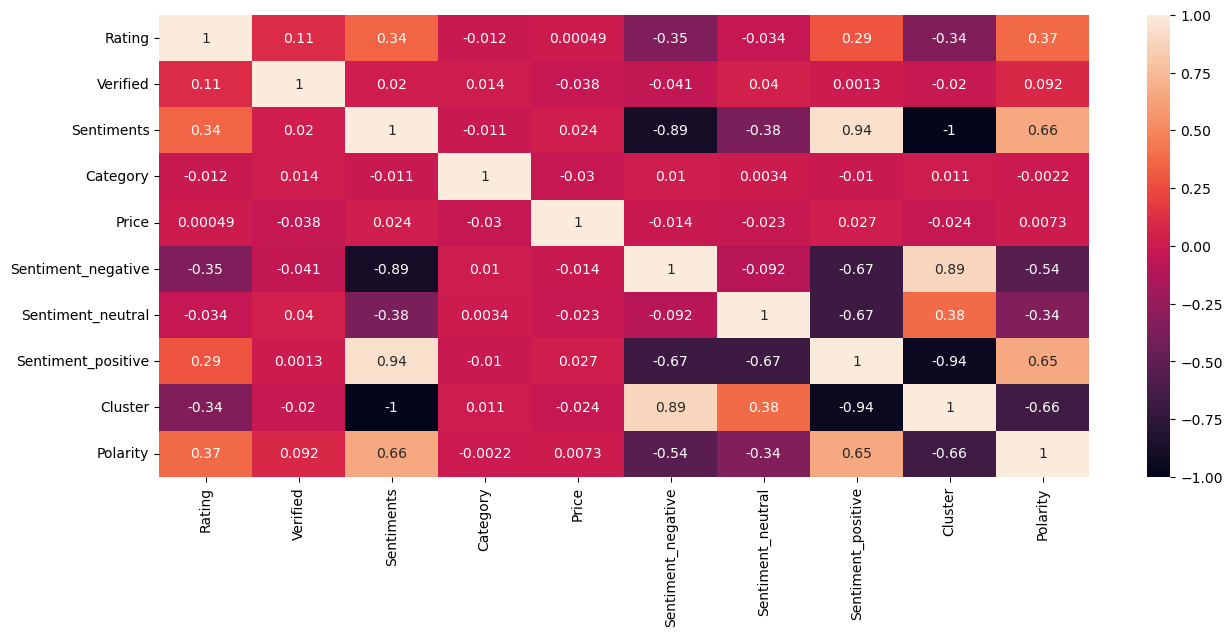

In [93]:
# Plotting correlation to note which features are impacting our target

plt.figure(figsize = (15, 6))
sb.heatmap(Grocery.corr(), annot = True)
plt.show()

**Cluster, Rating, Polarity are highly impacting columns**

In [7]:
#Importing Libraries

# For splitting the data

from sklearn.model_selection import train_test_split

# To convert the review text to numerics

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For Calculating performance of the models

from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
    
from sklearn.metrics import roc_curve, roc_auc_score

# classification Models

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import LatentDirichletAllocation

from lazypredict.Supervised import LazyClassifier

In [13]:
# Split the data into features and target

x = Grocery['Review']

y = Grocery['Sentiments']

In [14]:
# first, convert the text data to numerical form using TF-IDF vectorization

vectorizer = CountVectorizer()

x = vectorizer.fit_transform(x)

In [9]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

# <center><font color = 'green'> Model <font color = 'orange'>Building
# <font color = 'green'>Logistic Regression

In [23]:
# Performing Logistic Regression

from sklearn.linear_model import LogisticRegression

def LogisticRegressionModel(x_train, x_test, y_train, y_test):
    
    # Building the model
    
    model_lg = LogisticRegression(multi_class = 'ovr', random_state = 42)                                             
    model_lg.fit(x_train, y_train)                                                 
    
    # Prediction
    
    pred_lg = model_lg.predict(x_test) 
    
    # Training score
    
    train_score_lg = model_lg.predict(x_train)   
    train_acc_lg = accuracy_score(y_train, train_score_lg).round(2)
    
    # Model evaluation - accuracy, recall, precision, f1 score
    
    accuracy_lg = accuracy_score(y_test, pred_lg).round(2)
    recall_lg = recall_score(y_test, pred_lg, average = 'weighted').round(2) 
    precision_lg = precision_score(y_test, pred_lg, average = 'weighted').round(2)
    f1_lg = f1_score(y_test, pred_lg, average = 'weighted').round(2)
    
    # Classification report and confusion matrix
    
    cr_lg = classification_report(y_test, pred_lg)                                 
    cm_lg = confusion_matrix(y_test, pred_lg)   

    return train_acc_lg, accuracy_lg, recall_lg, precision_lg, f1_lg, cr_lg, cm_lg, pred_lg, model_lg

Training_Score  =  0.99
Accuracy_Score  =  0.98
Recall_Score    =  0.98
Precision_Score =  0.98
F1_Score        =  0.98
	Classification report
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      2118
           1       0.92      0.97      0.94      2141
           2       0.99      0.99      0.99     20508

    accuracy                           0.98     24767
   macro avg       0.94      0.94      0.94     24767
weighted avg       0.98      0.98      0.98     24767



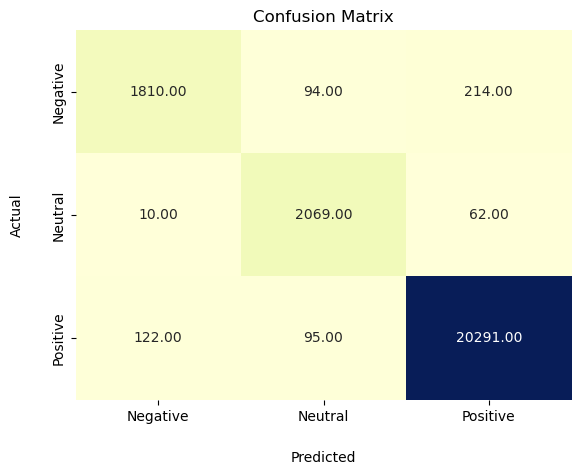

AUC_Score       = 0.9943896310378866


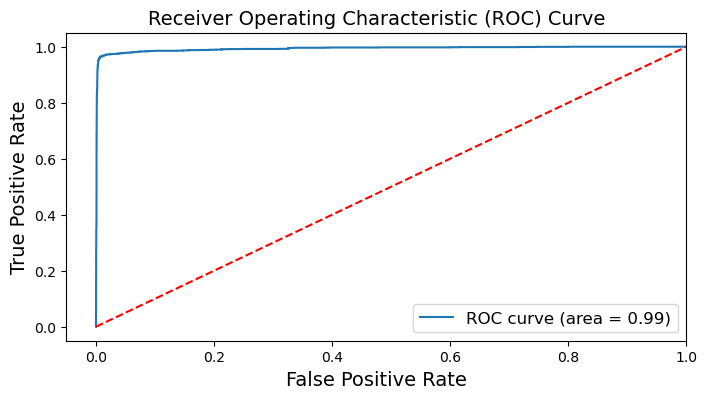

In [26]:
# Logistice regression

import seaborn as sb

import matplotlib.pyplot as plt

train_score_lg, accuracy_lg, recall_lg, precision_lg, f1_lg, cr_lg, cm_lg, pred_lg, model_lg = LogisticRegressionModel(x_train, x_test, y_train, y_test)

# Evaluation metrics

print('Training_Score  = ', train_score_lg)
print("Accuracy_Score  = ", accuracy_lg)
print("Recall_Score    = ", recall_lg)
print("Precision_Score = ", precision_lg)
print("F1_Score        = ", f1_lg)
print("\tClassification report\n", cr_lg)

sb.heatmap(cm_lg, annot = True, fmt = '.2f', cbar = False, cmap = 'YlGnBu', xticklabels = ['Negative', 'Neutral', 'Positive'],
           yticklabels = ['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual', labelpad = 20)
plt.xlabel('Predicted', labelpad = 20)
plt.show()

# ROC -AUC Curve

y_pred_prob_lg = model_lg.predict_proba(x_test)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, y_pred_prob_lg[:, 1], pos_label = 1)
auc_lg = roc_auc_score(y_test, y_pred_prob_lg, multi_class = 'ovr', average = 'weighted')

print("AUC_Score       =", auc_lg)

plt.figure(figsize = (8, 4))
plt.plot(fpr_lg, tpr_lg, label = 'ROC curve (area = %0.2f)' % auc_lg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize = 14)
plt.legend(loc = "lower right",fontsize = 12)
plt.show()

# Observation

* **The logistic regression classifier has achieved an accuracy score of 0.98, indicating that the model is able to correctly classify 98% of the samples in the test set.**

* **The recall score of 0.98 indicates that the model is able to correctly identify 98% of the true positive cases, while the precision score of 0.98 indicates that 98% of the cases identified as positive are actually true positives.**

* **The F1 score of 0.98 is a harmonic mean of precision and recall scores, and it is a measure of the model's overall performance.**

* **The classification report provides the precision, recall, and F1 score for each class, as well as their support (number of samples). We can see that the model performs well for all classes, with high precision, recall, and F1 score values.**

* **The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. We can see that the model performs well for all classes, with only a few misclassifications.**

* **Also in addition we get a nice complete roc curve with 99% auc socres.**


# <font color = 'green'>Multinomial NB

In [28]:
def Naivebayes(x_train, x_test, y_train, y_test):
    
    # Building the model
    
    model_nb = MultinomialNB()                                                  
    model_nb = model_nb.fit(x_train, y_train)                                             
    
    # Prediction
    
    pred_nb = model_nb.predict(x_test) 
    
    # Training score
    
    train_score = model_nb.predict(x_train)   
    train_acc = accuracy_score(y_train, train_score).round(2)
    
    # Model evaluation - accuracy, recall, precision, f1 score
    
    accuracy = accuracy_score(y_test, pred_nb).round(2)
    recall = recall_score(y_test, pred_nb, average = 'weighted').round(2)
    precision = precision_score(y_test, pred_nb, average = 'weighted').round(2)
    f1 = f1_score(y_test, pred_nb, average = 'weighted').round(2)
    
    # Classification report and confusion matrix
    
    cr = classification_report(y_test, pred_nb)                                 
    cm = confusion_matrix(y_test, pred_nb)   

    return train_acc, accuracy, recall, precision, f1, cr, cm, pred_nb, model_nb

Training_Score  =  0.87
Accuracy_Score  =  0.85
Recall_Score    =  0.85
Precision_Score =  0.85
F1_Score        =  0.81
Classification report
               precision    recall  f1-score   support

           0       0.70      0.27      0.39      2118
           1       0.94      0.09      0.17      2141
           2       0.85      0.99      0.92     20508

    accuracy                           0.85     24767
   macro avg       0.83      0.45      0.49     24767
weighted avg       0.85      0.85      0.81     24767



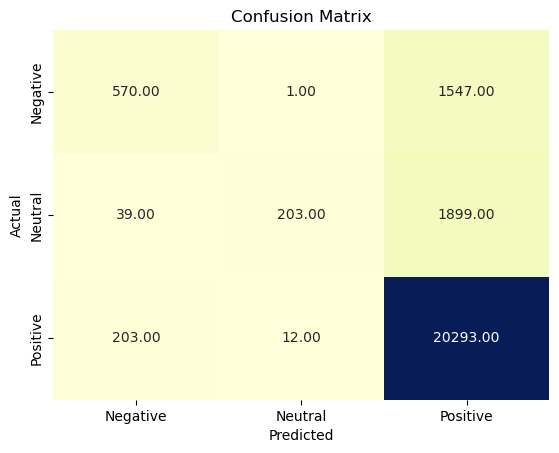

AUC_Score       = 0.9113901063285113


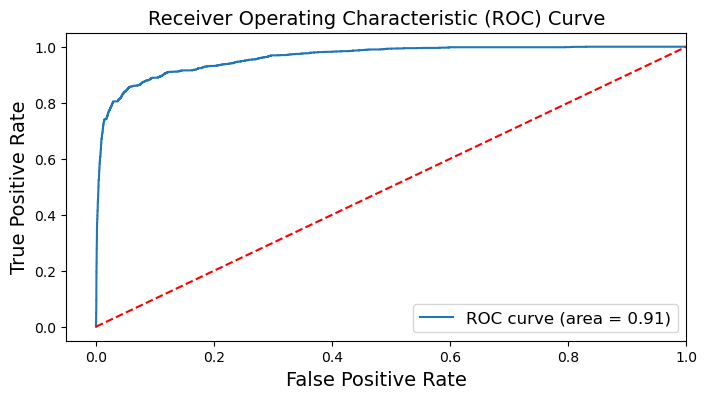

In [29]:
# Performing Naive Bayes

train_score_nb, accuracy_nb, recall_nb, precision_nb, f1_nb, cr_nb, cm_nb, pred_nb, model_nb = Naivebayes(x_train, 
                                                                                                        x_test, y_train, y_test)
                                                                                                              
# Evaluation metrics

print('Training_Score  = ',train_score_nb)
print("Accuracy_Score  = ",accuracy_nb)
print("Recall_Score    = ",recall_nb)
print("Precision_Score = ",precision_nb)
print("F1_Score        = ",f1_nb)
print("Classification report\n",cr_nb)

sb.heatmap(cm_nb, annot = True, fmt = '.2f', cbar = False, cmap = 'YlGnBu', xticklabels = ['Negative', 'Neutral', 'Positive'],
           yticklabels = ['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xticks
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC -AUC Curve

y_pred_prob_nb = model_nb.predict_proba(x_test)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb[:, 1], pos_label = 1)
auc_nb = roc_auc_score(y_test, y_pred_prob_nb, multi_class = 'ovr', average = 'weighted')

print("AUC_Score       =", auc_nb)

plt.figure(figsize = (8, 4))
plt.plot(fpr_nb, tpr_nb, label = 'ROC curve (area = %0.2f)' % auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize = 14)
plt.legend(loc = "lower right",fontsize = 12)
plt.show()

# Observation 

**Based on the evaluation metrics** 

* **The Multinomial NB achieved an accuracy score of 0.87 but it performs poorly in predicting classes 0 and 1.** 
* **The model performed well in classifying positive reviews with a precision of 0.85 and a recall of 0.85.** 
* **The recall score for both classes, indicating that when the model predicts class 0 or 1, it is likely to be incorrect.**

**Therefore, we can conclude that Multinomial NB is not a good fit for this data.**

# <font color = 'green'>Random Forest

In [30]:
# Performing Random Forest

def RandomForest(x_train, x_test, y_train, y_test):
    
    # Building the model
    
    model_rf = RandomForestClassifier(random_state = 42)                                                  
    model_rf.fit(x_train, y_train)                                             
    
    
    # Prediction
    
    pred_rf = model_rf.predict(x_test) 
    
    # Training score
    
    train_score_rf = model_rf.predict(x_train)   
    train_acc_rf = accuracy_score(y_train, train_score_rf).round(2)
    
    # Model evaluation - accuracy, recall, precision, f1 score
    
    accuracy_rf = accuracy_score(y_test, pred_rf).round(2)
    recall_rf = recall_score(y_test, pred_rf, average = 'weighted').round(2) 
    precision_rf = precision_score(y_test, pred_rf, average = 'weighted').round(2)
    f1_rf = f1_score(y_test, pred_rf, average = 'weighted').round(2)
    
    # Classification report and confusion matrix
    
    cr_rf = classification_report(y_test, pred_rf)                                 
    cm_rf = confusion_matrix(y_test, pred_rf)   

    return train_acc_rf, accuracy_rf, recall_rf, precision_rf, f1_rf, cr_rf, cm_rf, pred_rf, model_rf

Training_Score  =  1.0
Accuracy_Score  =  0.94
Recall_Score    =  0.94
Precision_Score =  0.94
F1_Score        =  0.93
	Classification report
               precision    recall  f1-score   support

           0       0.98      0.44      0.61      2118
           1       0.91      0.90      0.90      2141
           2       0.94      0.99      0.97     20508

    accuracy                           0.94     24767
   macro avg       0.94      0.78      0.82     24767
weighted avg       0.94      0.94      0.93     24767



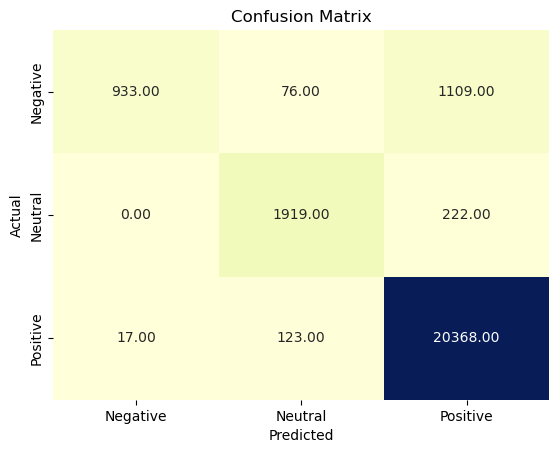

AUC_Score       = 0.9861208359736602


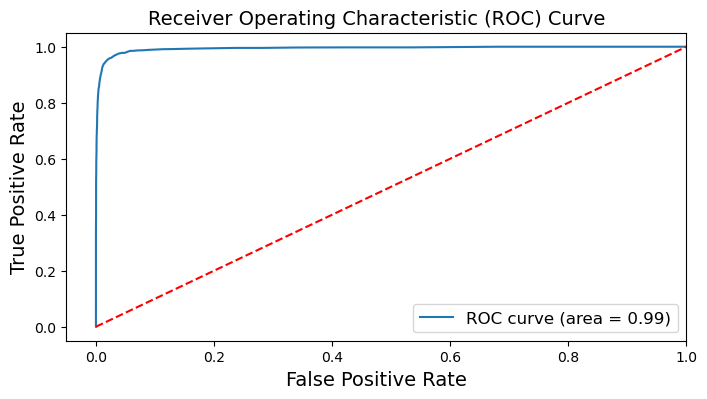

In [31]:
# Performing Random Forest

train_score_rf, accuracy_rf, recall_rf, precision_rf, f1_rf, cr_rf, cm_rf, pred_rf, model_rf = RandomForest(x_train, 
                                                                                                        x_test, y_train, y_test)

# Evaluation metrics

print('Training_Score  = ',train_score_rf)
print("Accuracy_Score  = ",accuracy_rf)
print("Recall_Score    = ",recall_rf)
print("Precision_Score = ",precision_rf)
print("F1_Score        = ",f1_rf)
print("\tClassification report\n",cr_rf)

sb.heatmap(cm_rf, annot = True, fmt = '.2f', cbar = False, cmap = 'YlGnBu', xticklabels = ['Negative', 'Neutral', 'Positive'],
           yticklabels = ['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC -AUC Curve

y_pred_prob_rf = model_rf.predict_proba(x_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf[:, 1], pos_label = 1)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf, multi_class = 'ovr', average = 'weighted')

print("AUC_Score       =", auc_rf)

plt.figure(figsize = (8, 4))
plt.plot(fpr_rf, tpr_rf, label = 'ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize = 14)
plt.legend(loc = "lower right",fontsize = 12)
plt.show()

# Observation 

**Based on the evaluation metrics and the confusion matrix** 
* **The model exhibits a training score of 1.0, indicating that it has learned the training data's patterns and performed exceptionally well in the training phase.** 

* **The accuracy score of 0.94 suggests that the model has predicted the sentiment classes correctly in 94% of the cases.**

* **The recall score of 0.94 indicates that the model has correctly identified 94% of the positive labels.**

* **The precision score of 0.94 indicates that the model has accurately predicted 94% of the positive labels of all predicted positive labels.**

* **based on the confusion matrix, the model has predicted relatively fewer negative sentiment cases accurately.**

* **Also in addition we get a nice complete roc curve with 99% auc socre**

**Overall, it can be concluded that the random forest model was able to effectively capture the patterns in the data and make 94%accurate predictions.**

**Also the model needs to be trained more to predict and classify negative sentiments**


# <font color = 'green'>AdaBoost Classifier 

In [32]:
# Performing AdaBoost Classifier

def AdaBoost(x_train, x_test, y_train, y_test):
    
    # Building the model
    
    model_ab = AdaBoostClassifier(random_state = 42)                                                  
    model_ab = model_ab.fit(x_train, y_train)                                             
    
    # Prediction
    
    pred_ab = model_ab.predict(x_test) 
    
    # Training score
    
    train_score_ab = model_ab.predict(x_train)   
    train_acc_ab = accuracy_score(y_train, train_score_ab).round(2)
    
    # Model evaluation - accuracy, recall, precision, f1 score
    
    accuracy_ab = accuracy_score(y_test, pred_ab).round(2)
    recall_ab = recall_score(y_test, pred_ab, average = 'weighted').round(2) 
    precision_ab = precision_score(y_test, pred_ab, average = 'weighted').round(2)
    f1_ab = f1_score(y_test, pred_ab, average = 'weighted').round(2)
    
    # Classification report and confusion matrix
    
    cr_ab = classification_report(y_test, pred_ab)                                 
    cm_ab = confusion_matrix(y_test, pred_ab)   

    return train_acc_ab, accuracy_ab, recall_ab, precision_ab, f1_ab, cr_ab, cm_ab, pred_ab, model_ab

Training_Score  =  0.89
Accuracy_Score  =  0.9
Recall_Score    =  0.9
Precision_Score =  0.91
F1_Score        =  0.9
	Classification report
               precision    recall  f1-score   support

           0       0.79      0.46      0.58      2118
           1       0.58      0.90      0.71      2141
           2       0.95      0.94      0.95     20508

    accuracy                           0.90     24767
   macro avg       0.77      0.77      0.74     24767
weighted avg       0.91      0.90      0.90     24767



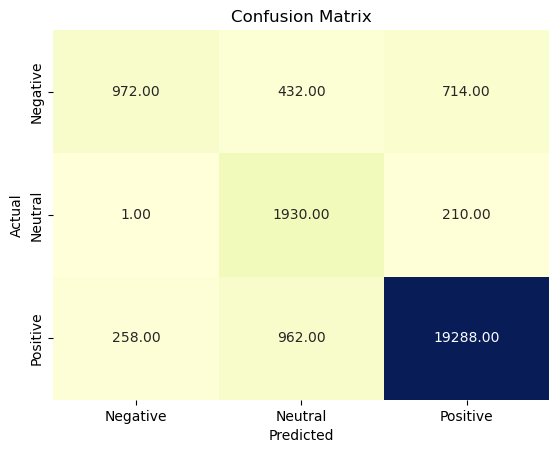

AUC_Score       = 0.8159532478431233


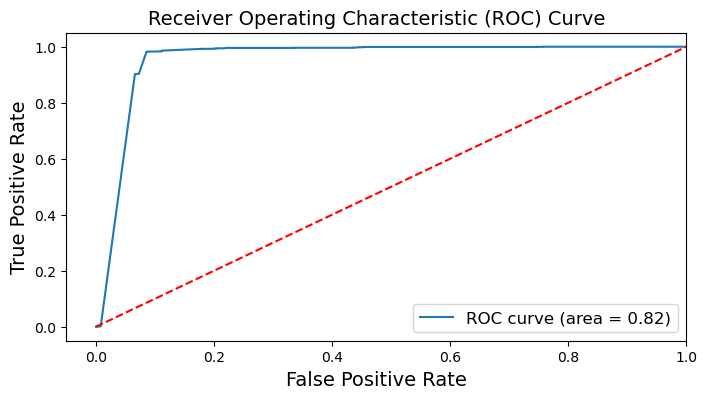

In [33]:
# Performing AdaBoost Classifier

train_score_ab, accuracy_ab, recall_ab, precision_ab, f1_ab, cr_ab, cm_ab, pred_ab, model_ab = AdaBoost(x_train, 
                                                                                                        x_test, y_train, y_test)

# Evaluation metrics

print('Training_Score  = ', train_score_ab)
print("Accuracy_Score  = ", accuracy_ab)
print("Recall_Score    = ", recall_ab)
print("Precision_Score = ", precision_ab)
print("F1_Score        = ", f1_ab)
print("\tClassification report\n", cr_ab)

sb.heatmap(cm_ab, annot = True, fmt = '.2f', cbar = False, cmap = 'YlGnBu', xticklabels = ['Negative', 'Neutral', 'Positive'],
           yticklabels = ['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC -AUC Curve

y_pred_prob_ab = model_ab.predict_proba(x_test)
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_pred_prob_ab[:, 1], pos_label = 1)
auc_ab = roc_auc_score(y_test, y_pred_prob_ab, multi_class = 'ovr', average = 'weighted')

print("AUC_Score       =", auc_ab)

plt.figure(figsize = (8, 4))
plt.plot(fpr_ab, tpr_ab, label = 'ROC curve (area = %0.2f)' % auc_ab)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize = 14)
plt.legend(loc = "lower right",fontsize = 12)
plt.show()

# Observations

**Based on the classification report and confusion matrix**

* **First, the training score is 0.89, which means that the model has performed well in training and has learned the given patterns from the data..** 

* **The accuracy score is also 0.9, which indicates that the model has correctly predicted the sentiment class in 90% of the cases.**

* **The recall score is 0.9, which means that the model has correctly identified 90% of the positive labels.** 

* **The precision score is 0.91, which means that the model has correctly predicted 91% of the positive labels out of all predicted positive labels.** 

* **In confusion matrix, the model made a higher number of incorrect predictions for the negative class than the other classes. Because due to imbalance in data the model was not able to classify.**

**Therefore, we can conclude that the AdaBoost Classifier is a good fit to classify class 2.Also compared with random forest adaboost cannot match up.**

In [185]:
# Stroing the results as a table for

ACC = [accuracy_ab, accuracy_lg, accuracy_rf, accuracy_nb]

RECALL = [recall_ab, recall_lg, recall_rf, recall_nb]

PRECISION = [precision_ab, precision_lg, precision_rf, precision_nb]

F1SCORE = [f1_ab, f1_lg, f1_rf, f1_nb]

AUC = [auc_ab, auc_lg, auc_rf, auc_nb]

# Create a table of all scores

results_df = pd.DataFrame({'Model' : ['AdaBoost', 'Logixtic Regression', 'RandomForest', 'MultinomialNB'],
    'F1 Score': F1SCORE,
    'Accuracy': ACC,
    'AUC Score': AUC,
    'Precision' : PRECISION,
    'Recall' : RECALL})

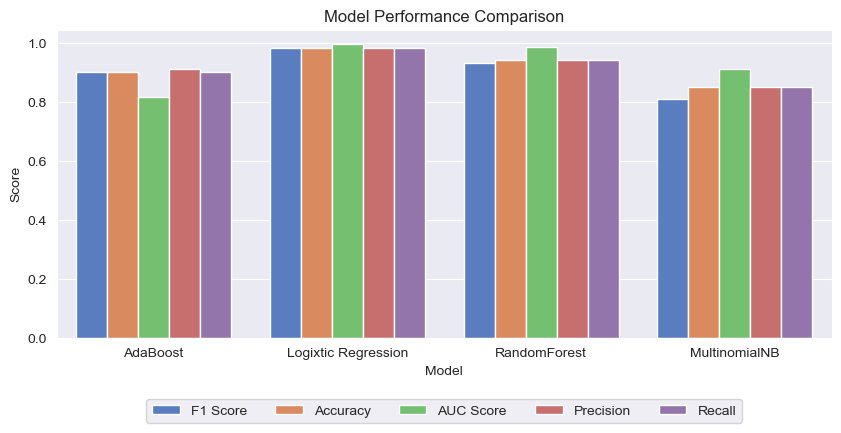

In [197]:
plt.figure(figsize=(10, 4))

import seaborn as sb

model_results_melted = pd.melt(results_df, id_vars = 'Model', var_name = 'Metric', value_name = 'Score')

sb.set_style('darkgrid')

sb.barplot(x = 'Model', y = 'Score', hue = 'Metric', data = model_results_melted, palette = 'muted')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend(loc = 'lower center', ncol = 6, bbox_to_anchor = (0.5, -0.3))


plt.show()

# Conclusion

* **Logistic Regression is the best performing model among all that have been evaluated for sentiment classification of text data.** 
    
    * **Reason - It has the highest F1 score of 0.98, along with the highest accuracy score of 0.98. The model also achieves a significantly good AUC score of 0.98, indicating its ability to differentiate classes.**

* **Random Forest Classifier is the second-best model among all that have been evaluated for sentiment classification of text data.** 
    * **Reason - It has an F1 score of 0.93 and an accuracy score of 0.94, with high precision and recall scores of 0.94. The model achieves the highest AUC score of 0.98, indicating its superior ability to differentiate between different classes.**

* **AdaBoost classifier and MultinomialNB classifier have evaluated lower on different evaluation metrics, with F1 scores of 0.9 and 0.81, respectively, and a lower accuracy score. The AUC score of AdaBoost is 0.89, lower than the other models.**



**Based on overall consideration of evaluation metrics,** 

**The Logistic Regfression and RandomForest appears to be the best performing model. Based on the accuracy, precision, and recall scores, roc curve, auc scores than other models, indicating the model's better ability to predict the sentiment of the text data.**

* **Therefore, it is recommended to try both the Logistic Regfression  and RandomForest for sentiment classification.**

# <center><font color = 'green'>GUI

In [1]:
# importing necessary libraries for creating a GUI

from tkinter import *

from tkinter import filedialo0g

from tkinter import messagebox

import joblib

import re

import pickle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# Saving the models

pickle.dump(model_rf, open('Random Forest', 'wb'))

pickle.dump(model_lg, open('Logistic Regression', 'wb'))

NameError: name 'model_rf' is not defined

In [20]:
model =  pickle.load(open('Logistic Regression', 'rb'))

root = Tk()
root.title("Sentiment Analysis")

# create labels and entry fields
label = Label(root, text="Enter your review:")
label.pack()

entry = Entry(root, width=50)
entry.pack()

output = Label(root, text="", pady=10)
output.pack()

# function to predict the sentiment
def predict_sentiment():
    # get the user input
    review = entry.get()

    # preprocess the review using regex
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()

    # vectorize the review
    review_vector = vectorizer.transform([review])

    # make the prediction and output the result
    prediction = model.predict(review_vector)
    if prediction == 0:
        output.configure(text="Negative")
    elif prediction == 1:
        output.configure(text="Neutral")
    elif prediction == 2:
        output.configure(text="Positive")

# create the predict button
button = Button(root, text="Predict", command=predict_sentiment)
button.pack()

# start the GUI
root.mainloop()

# Testing

**We tested this with a real case reviews and the model perfromace is good**

**Product Link:**
* **https://www.amazon.in/Mackays-Bluebry-Blackcurrant-Preserve-340g/dp/B007GZ16YG/ref=pd_rhf_d_eebr_s_pd_sbs_rvi_sccl_2_1/258-8775557-0743668?pd_rd_w=rLAna&content-id=amzn1.sym.f2f99b52-a5ca-432b-8bfe-0d72feb3d1ba&pf_rd_p=f2f99b52-a5ca-432b-8bfe-0d72feb3d1ba&pf_rd_r=FQXMY67DE8TJ156RZZFW&pd_rd_wg=mFJev&pd_rd_r=74284fb7-4f93-46f1-96e4-4e88f2c52c03&pd_rd_i=B007GZ16YG&th=1**

---
1. **Loved the jam I found real strawberries seeds : <font color = 'green'>positive**
    
2. **Overall the taste of the jam is authentic. The colour and the texture is appropriate. : <font color = 'green'>positive**

3. **Product fine but quantity voice short increase the quantity in same price : <font color = 'green'>positive**

4. **I ordered three berry preserve but got strawberry preserve instead, very disappointed with Amazon and the taste is so sweet that it overshadows the fruit taste. Yuck. : <font color = 'red'>negative**

5. **This was the worst preserve I had in my life so far....disappointment : <font color = 'red'>negative**

6. **BEWARE Chaps delivered strawberry flavour instead of Three berry mentioned on the photo - BEWARE : <font color = 'blue'>neutral**

7. **There was no apricot taste. It was just sugar syrup. Very poor : <font color = 'blue'>Neutral**

8. **Bad taste. Don't vuy one of the worst products on amazon : <font color = 'red'>negative**

9. **Wrong product : <font color = 'red'>negative**

10. **Horrible : <font color = 'red'>negative**